# Proyecto 03 - Procesamiento del Lenguaje Natural

## Dataset: The Multilingual Amazon Reviews Corpus

**Recuerda descargar el dataset de [aquí](https://github.com/kang205/SASRec). Es un archivo .zip que contiene tres documentos. Más información sobre el dataset [aquí](https://registry.opendata.aws/amazon-reviews-ml/). Es importante que tengas en cuenta la [licencia](https://docs.opendata.aws/amazon-reviews-ml/license.txt) de este dataset.**

### Exploración de datos y Procesamiento del Lenguaje Natural

Dedícale un buen tiempo a hacer un Análisis Exploratorio de Datos. Considera que hasta que no hayas aplicado las herramientas de Procesamiento del Lenguaje Natural vistas, será difícil completar este análisis. Elige preguntas que creas que puedas responder con este dataset. Por ejemplo, ¿qué palabras están asociadas a calificaciones positivas y qué palabras a calificaciones negativas?

### Machine Learning

Implementa un modelo que, dada la crítica de un producto, asigne la cantidad de estrellas correspondiente. **Para pensar**: ¿es un problema de Clasificación o de Regresión?

1. Haz todas las transformaciones de datos que consideres necesarias. Justifica.
1. Evalúa de forma apropiada sus resultados. Justifica la métrica elegida.
1. Elige un modelo benchmark y compara tus resultados con este modelo.
1. Optimiza los hiperparámetros de tu modelo.
1. Intenta responder la pregunta: ¿Qué información está usando el modelo para predecir?

**Recomendación:** si no te resulta conveniente trabajar en español con NLTK, te recomendamos que explores la librería [spaCy](https://spacy.io/).

### Para pensar, investigar y, opcionalmente, implementar
1. ¿Valdrá la pena convertir el problema de Machine Learning en un problema binario? Es decir, asignar únicamente las etiquetas Positiva y Negativa a cada crítica y hacer un modelo que, en lugar de predecir las estrellas, prediga esa etiqueta. Pensar en qué situación puede ser útil. ¿Esperas que el desempeño sea mejor o peor?
1. ¿Hay algo que te gustaría investigar o probar?

### **¡Tómate tiempo para investigar y leer mucho!**

#A. Analisis exploratorio de datos

In [1]:
# Clase para dar formato al texto
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

In [2]:
# Importo librerías necesarias 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import re
import time
from wordcloud import WordCloud
import gc # Garbage collector para optimizar recursos 

In [ ]:
!pip3 install -U spacy
!python3 -m spacy download es_core_news_md

     |████████████████████████████████| 5.9 MB 4.4 MB/s 
     |████████████████████████████████| 456 kB 55.6 MB/s 
     |████████████████████████████████| 42 kB 1.3 MB/s 
     |████████████████████████████████| 623 kB 58.2 MB/s 
     |████████████████████████████████| 10.1 MB 57.7 MB/s 
  Attempting uninstall: catalogue
    Found existing installation: catalogue 1.0.0
    Uninstalling catalogue-1.0.0:
      Successfully uninstalled catalogue-1.0.0
  Attempting uninstall: srsly
    Found existing installation: srsly 1.0.5
    Uninstalling srsly-1.0.5:
      Successfully uninstalled srsly-1.0.5
  Attempting uninstall: thinc
    Found existing installation: thinc 7.4.0
    Uninstalling thinc-7.4.0:
      Successfully uninstalled thinc-7.4.0
  Attempting uninstall: spacy
    Found existing installation: spacy 2.2.4
    Uninstalling spacy-2.2.4:
      Successfully uninstalled spacy-2.2.4
     |████████████████████████████████| 42.7 MB 48 kB/s 
✔ Download and installation successful
You can 

In [ ]:
import spacy
nlp = spacy.load('es_core_news_md')# Cargo vocabulario en español de tamaño mediano

##PREPROCESAMIENTO
Tokenización: dividir el texto en palabras, signos de puntuación, números, etc . Los tokens son cada una de las partes individuales de una oración que tienen algun valor semántico.



## RESEÑAS AMAZON

In [ ]:
df_dev=pd.read_json("https://raw.githubusercontent.com/rpettenon/Data_Science_Acamica/main/Proyecto%203/dataset_amazon/dataset_es_dev.json", lines=True)
df_test=pd.read_json("https://raw.githubusercontent.com/rpettenon/Data_Science_Acamica/main/Proyecto%203/dataset_amazon/dataset_es_test.json", lines=True)
df_train=pd.read_json("https://raw.githubusercontent.com/rpettenon/Data_Science_Acamica/main/Proyecto%203/dataset_amazon/dataset_es_train.json", lines=True)

In [ ]:
df_train.head(20)

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,es_0491108,product_es_0296024,reviewer_es_0999081,1,Nada bueno se me fue ka pantalla en menos de 8...,television Nevir,es,electronics
1,es_0869872,product_es_0922286,reviewer_es_0216771,1,"Horrible, nos tuvimos que comprar otro porque ...",Dinero tirado a la basura con esta compra,es,electronics
2,es_0811721,product_es_0474543,reviewer_es_0929213,1,Te obligan a comprar dos unidades y te llega s...,solo llega una unidad cuando te obligan a comp...,es,drugstore
3,es_0359921,product_es_0656090,reviewer_es_0224702,1,"No entro en descalificar al vendedor, solo pue...",PRODUCTO NO RECIBIDO.,es,wireless
4,es_0068940,product_es_0662544,reviewer_es_0224827,1,Llega tarde y co la talla equivocada,Devuelto,es,shoes
5,es_0779978,product_es_0103315,reviewer_es_0304973,1,Jamás me llegó y el vendedor nunca contacto co...,Jamás me llegó,es,home
6,es_0591840,product_es_0880915,reviewer_es_0642702,1,"El paraguas es de muy mala calidad,da la sensa...",Horroroso!!!,es,luggage
7,es_0173297,product_es_0814677,reviewer_es_0895784,1,Tuve que devolverla porque al ser triangular n...,Poco funcional,es,office_product
8,es_0101300,product_es_0654228,reviewer_es_0789283,1,Estoy esperando despues de protestar varias ve...,No me llego,es,electronics
9,es_0487007,product_es_0877793,reviewer_es_0986278,1,"Defectuoso. En apariencia muy bien producto, p...","Mala calidad, defectuoso",es,kitchen


In [ ]:
# Veamos las dimenciones de los 3 dataset provistos
j=0
nombre_dataset=['Train','Dev','Test'] 
lista_dataset=[df_train,df_dev,df_test]
for i in lista_dataset:
  print(color.DARKCYAN + "Dimensión del dataset: ",nombre_dataset[j], i.shape)
  j=j+1

Dimensión del dataset:  Train (200000, 8)
Dimensión del dataset:  Dev (5000, 8)
Dimensión del dataset:  Test (5000, 8)


Podemos ver que tanto dev como test tienen la misma dimención

In [ ]:
# Revisamos la cantidad de registros por Estrellas
j=0
for i in lista_dataset:
  print(color.DARKCYAN+  "Cantidad de registros por Estrella para ",nombre_dataset[j],"\n","--"*25, sep="")
  print(i['stars'].value_counts(),"\n")
  j=j+1
  

Cantidad de registros por Estrella para Train
--------------------------------------------------
5    40000
4    40000
3    40000
2    40000
1    40000
Name: stars, dtype: int64 

Cantidad de registros por Estrella para Dev
--------------------------------------------------
3    1000
2    1000
5    1000
1    1000
4    1000
Name: stars, dtype: int64 

Cantidad de registros por Estrella para Test
--------------------------------------------------
3    1000
2    1000
5    1000
1    1000
4    1000
Name: stars, dtype: int64 



En base a lo observado podemos decir que los dataset están balanceados

In [ ]:
#Verifico lenguaje de los registros
print(color.DARKCYAN +"Verifico lenguaje\n","--"*25, sep="")
for i in lista_dataset:
  print(color.DARKCYAN +
  "", i['language'].value_counts(),"\n","--"*25, sep="")

  

Verifico lenguaje
--------------------------------------------------
es    200000
Name: language, dtype: int64
--------------------------------------------------
es    5000
Name: language, dtype: int64
--------------------------------------------------
es    5000
Name: language, dtype: int64
--------------------------------------------------


Se observa que todos están en lenguaje Español ES

In [ ]:
# Verifico si existen nulos
j=0
for i in lista_dataset:
  print(color.BOLD + color.UNDERLINE + color.DARKCYAN +'Cantidad de nulos por columnas:', nombre_dataset[j] ,'\n\n'+ color.END + color.DARKCYAN, i.isnull (). sum (), sep="")
  j=j+1

Cantidad de nulos por columnas:Train

review_id           0
product_id          0
reviewer_id         0
stars               0
review_body         0
review_title        0
language            0
product_category    0
dtype: int64
Cantidad de nulos por columnas:Dev

review_id           0
product_id          0
reviewer_id         0
stars               0
review_body         0
review_title        0
language            0
product_category    0
dtype: int64
Cantidad de nulos por columnas:Test

review_id           0
product_id          0
reviewer_id         0
stars               0
review_body         0
review_title        0
language            0
product_category    0
dtype: int64


Los dataset no presentan nulos

**Cantidad de productos por categoría**

In [ ]:
# Cantidad de instancias por categoría
j=0
for i in lista_dataset:
  print(color.BOLD + color.UNDERLINE + color.DARKCYAN +'Cantidad de instancias por categoría:', nombre_dataset[j] ,'\n\n'+ color.END + color.DARKCYAN, i.product_category.value_counts(), sep="")
 # print(i.groupby(["stars",'product_category']).agg({"stars":"mean","product_category":"size"}))#.sort_values(by="product_category", ascending=False).style.background_gradient(cmap='Blues')
  j=j+1

#print(color.BOLD +"Precio Promedio por barrio y cantidad\n","---"*20)


Cantidad de instancias por categoría:Train

home                        26962
wireless                    25886
toy                         13647
sports                      13189
pc                          11191
home_improvement            10879
electronics                 10385
beauty                       7337
automotive                   7143
kitchen                      6695
apparel                      5737
drugstore                    5513
book                         5264
furniture                    5229
baby_product                 4881
office_product               4771
lawn_and_garden              4237
other                        3937
pet_products                 3713
personal_care_appliances     3573
luggage                      3328
camera                       3029
shoes                        2754
digital_ebook_purchase       1843
video_games                  1733
jewelry                      1598
musical_instruments          1530
watch                        1490
indu

**Representación grafica de cantidad de productos por catergoría**

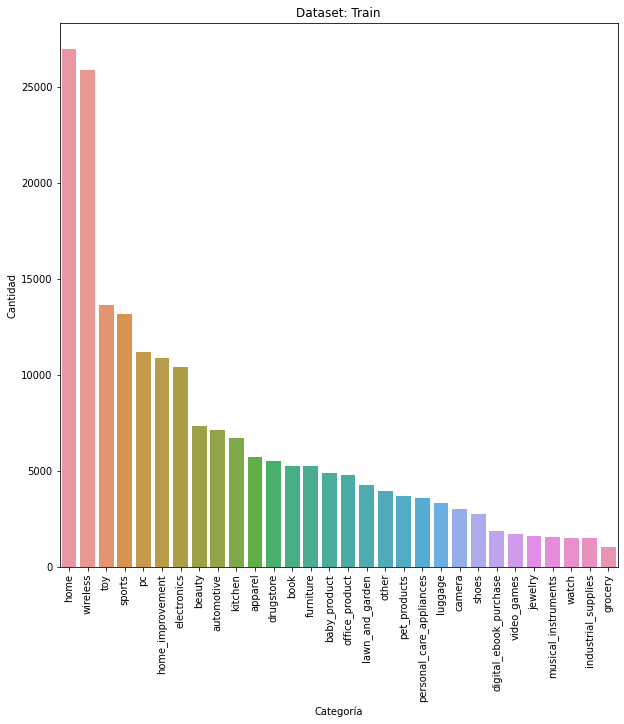

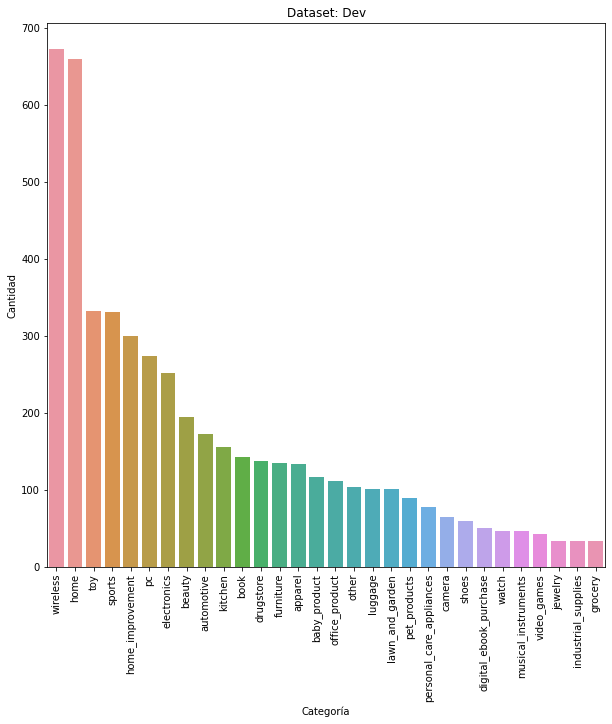

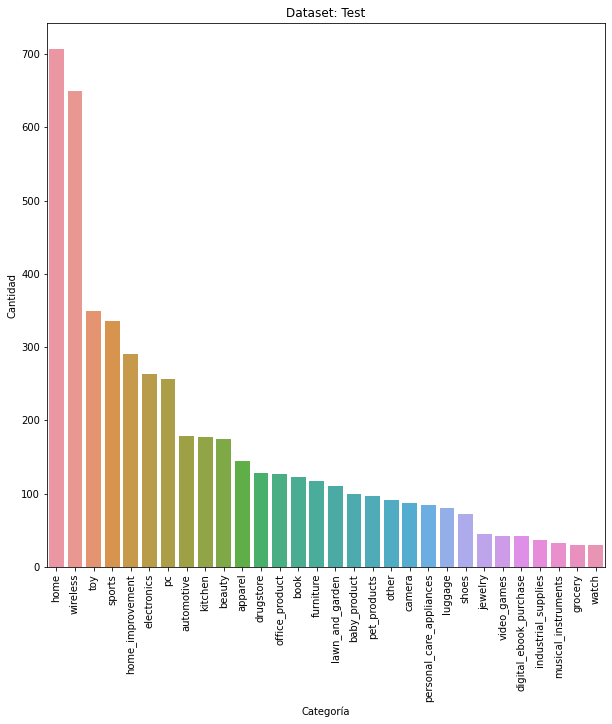

In [ ]:
j=0
for i in lista_dataset: 
  plt.figure(figsize = (10,10))
  sns.countplot(data = i, x = 'product_category', order = i['product_category'].value_counts().index)
  plt.title("Dataset: " + nombre_dataset[j])
  plt.xticks(rotation = 90)
  plt.xlabel('Categoría')
  plt.ylabel('Cantidad')
  plt.show()
  j=j+1

**Cantidad de productos por categoría y puntuación promedio**

In [ ]:
# Cantidad de instancias por categoría
j=0
for i in lista_dataset:
  #print(color.DARKCYAN, i.product_category.value_counts(), sep="")
  print(color.BOLD + color.UNDERLINE + color.DARKCYAN +'Cantidad de productos por categoría y puntuación promedio:', nombre_dataset[j] ,'\n\n'+ color.END + color.DARKCYAN, i.groupby(["product_category"]).agg({"product_category":"size","stars":"mean"}).sort_values(by='stars', ascending = False),'\n\n')
  j=j+1



Cantidad de productos por categoría y puntuación promedio: Train 

                           product_category     stars
product_category                                    
book                                  5264  3.399316
digital_ebook_purchase                1843  3.357027
luggage                               3328  3.293570
musical_instruments                   1530  3.225490
grocery                               1044  3.147510
video_games                           1733  3.124639
shoes                                 2754  3.109296
camera                                3029  3.109277
baby_product                          4881  3.089326
office_product                        4771  3.086565
other                                 3937  3.079756
industrial_supplies                   1482  3.078947
pc                                   11191  3.062550
furniture                             5229  3.048958
toy                                  13647  3.042061
home_improvement               

**Representación grafica del promedio de estrellas por categoría**

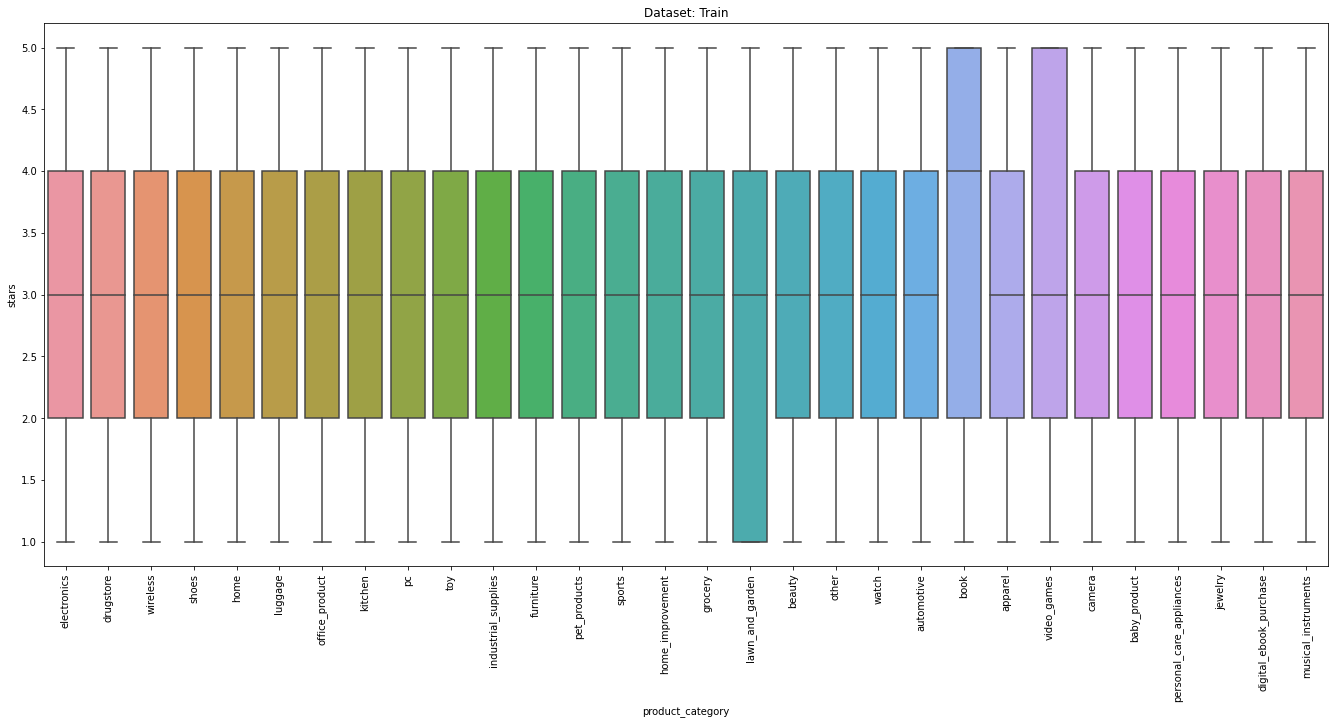

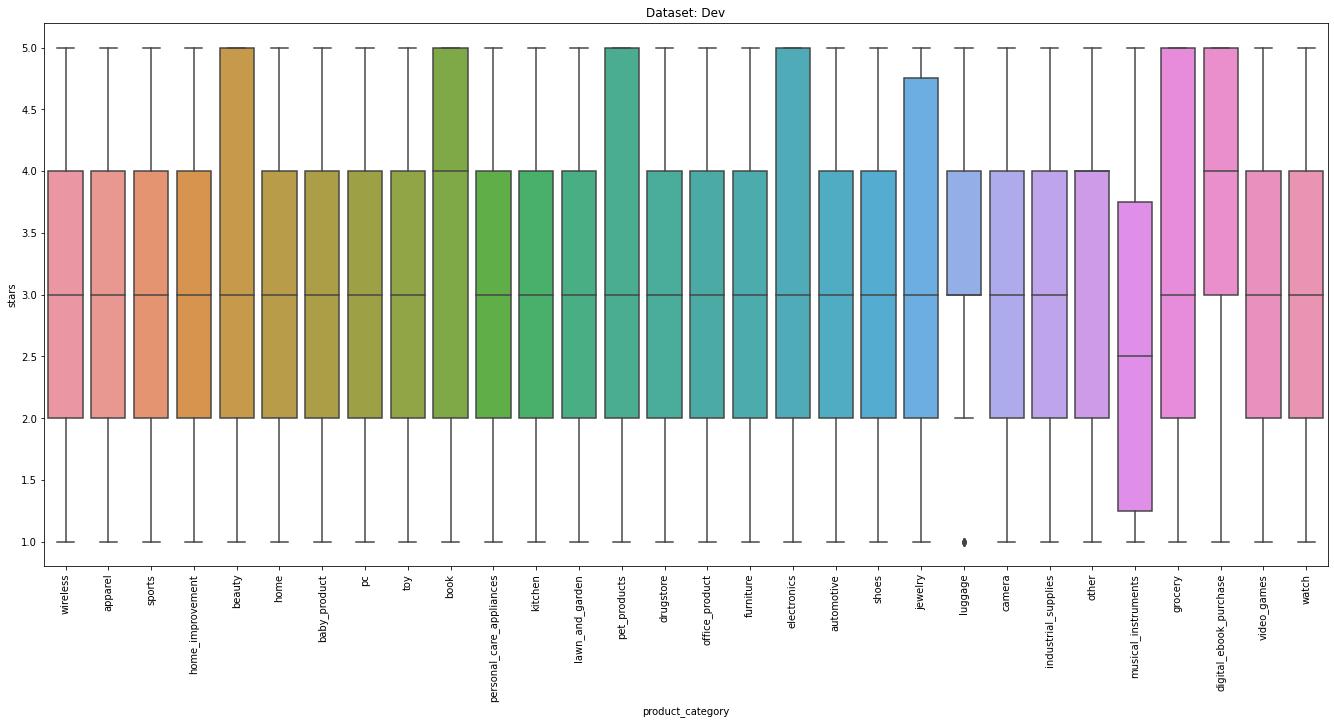

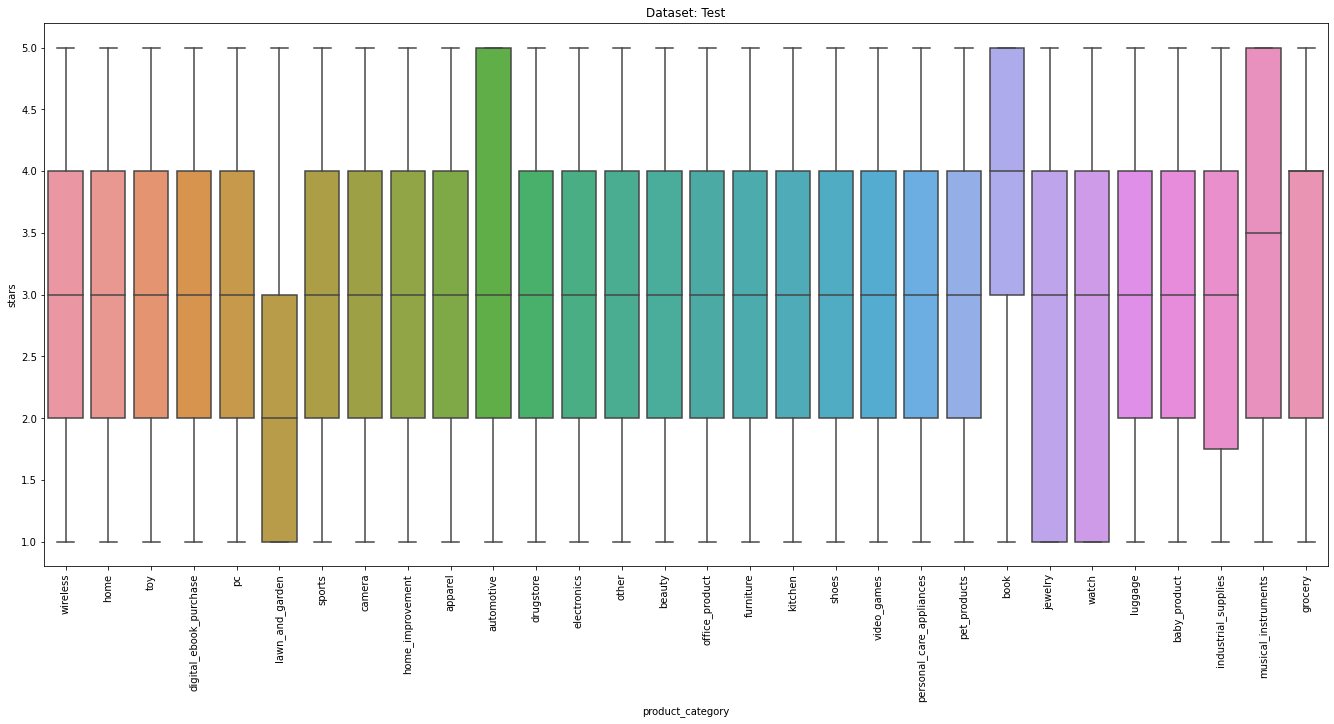

In [ ]:
# Promedio por categoría
j=0
for i in lista_dataset:
  plt.figure(figsize=(23,10))
  plt.xticks(rotation = 90)
  plt.title("Dataset: "+ nombre_dataset[j])
  #sns.violinplot(data = i, x = 'product_category', y = 'stars')
  
  sns.boxplot(data = i, x = 'product_category', y = 'stars')
  j=j+1

In [ ]:
# Cantidad de instancias por categoría
j=0
for i in lista_dataset:
  print(color.BOLD + color.UNDERLINE + color.DARKCYAN +'Cantidad de instancias por categoría:', nombre_dataset[j] ,'\n\n'+ color.END + color.DARKCYAN, i.groupby(["product_category","stars"]).agg({"product_category":"size"}))
  j=j+1


Cantidad de instancias por categoría: Train 

                         product_category
product_category stars                  
apparel          1                  1273
                 2                  1205
                 3                  1200
                 4                  1131
                 5                   928
...                                  ...
wireless         1                  6283
                 2                  5684
                 3                  4797
                 4                  4606
                 5                  4516

[150 rows x 1 columns]
Cantidad de instancias por categoría: Dev 

                         product_category
product_category stars                  
apparel          1                    20
                 2                    30
                 3                    36
                 4                    26
                 5                    21
...                                  ...
wireless         1     

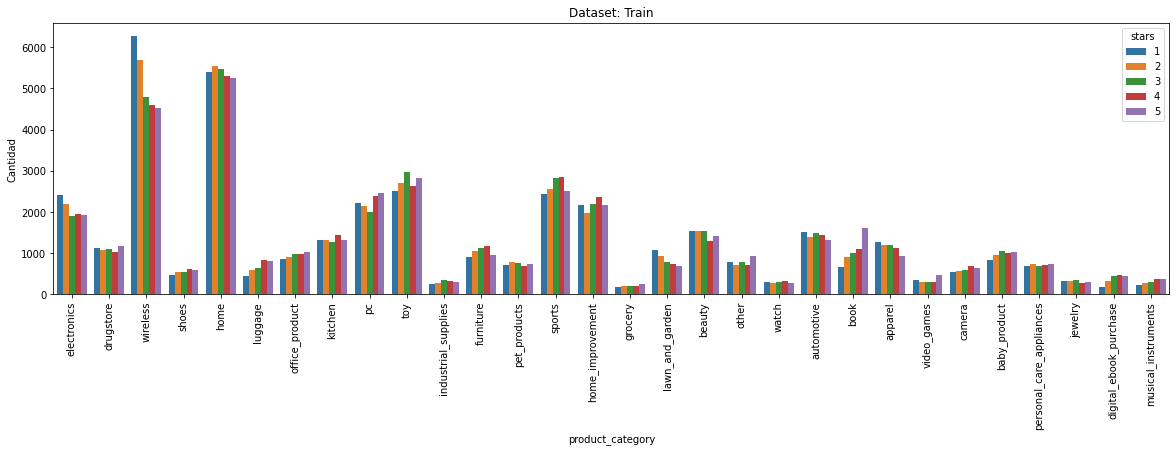

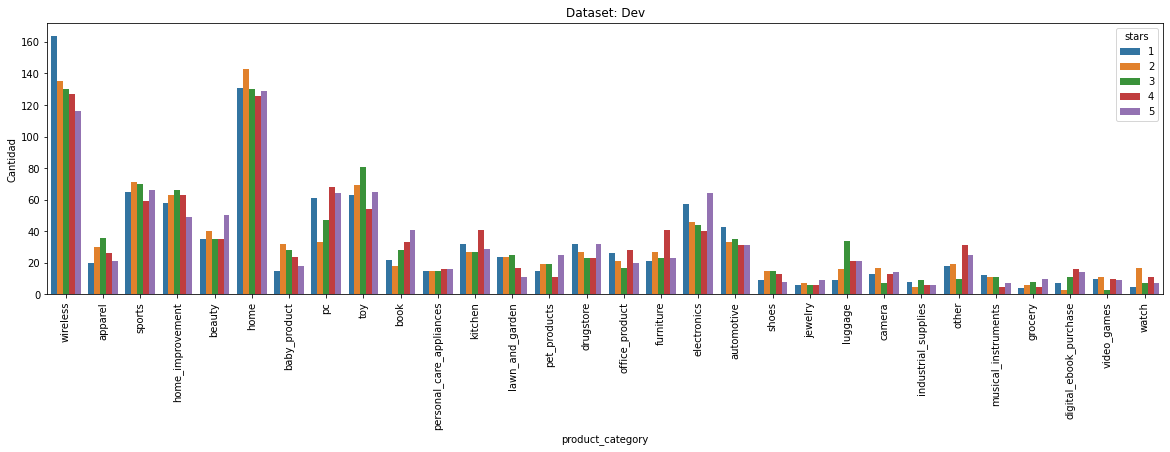

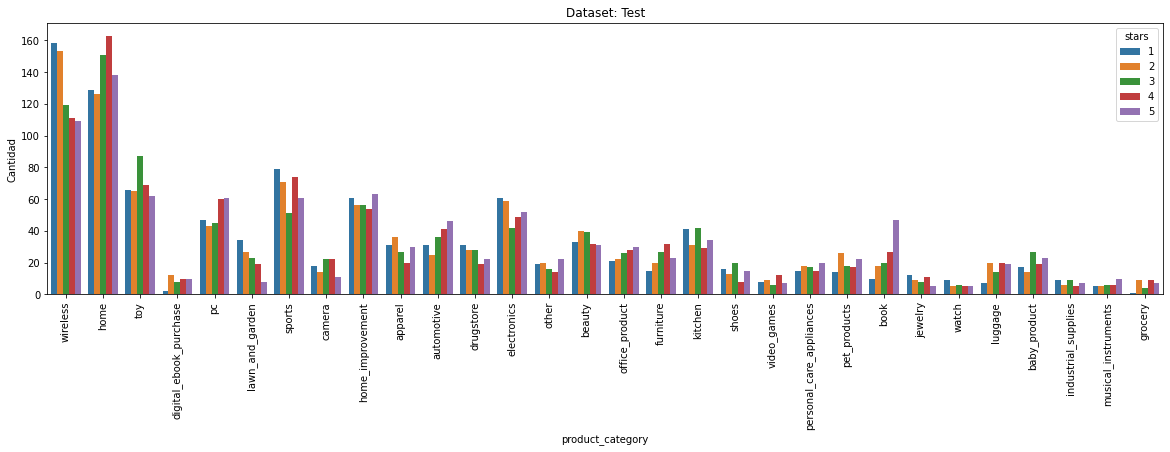

In [ ]:
j=0
for i in lista_dataset:
  plt.figure(figsize=(20,5))
  sns.countplot(x='product_category', data=i, hue='stars')
  plt.title("Dataset: "+ nombre_dataset[j])
  plt.xticks(rotation = 90)
  plt.ylabel('Cantidad')
  plt.show()
  j=j+1

In [ ]:
# Concatenon los data frame para tener todos los datos

data = pd.concat([df_train,df_dev,df_test])
data = data.reset_index(drop=True)
data.tail()

# En estapa de desarrollo usé dataset df_dev para optimizar los tiempos, luego comenté la linea debajo
#data=df_dev


,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
209995,es_0685611,product_es_0919143,reviewer_es_0461769,5,Para lo que cuesta es perfecto porque cumple s...,Perfectos para lo que sirven,es,wireless
209996,es_0638242,product_es_0636134,reviewer_es_0214562,5,"Material muy flexible y cómodo, acorde a la de...","Buen vendedor, rápido y fiable.",es,wireless
209997,es_0760108,product_es_0078583,reviewer_es_0043609,5,Se ve bien el grabado,medallas con bonito grabado,es,home
209998,es_0070806,product_es_0359350,reviewer_es_0258717,5,lo compré para mi bici pero finalmente se lo h...,timbre,es,sports
209999,es_0794544,product_es_0130307,reviewer_es_0651938,5,Pues este tipo de cascos si que son inalambric...,Auriculares sin cables de verdad,es,electronics


**Filtro columnas**

Me quedo con las columnas que son importantes para hacer la predicción

In [ ]:
# Filtro columnas
data = data[['product_category','review_title','review_body','stars']]
data.head()

,product_category,review_title,review_body,stars
0,electronics,television Nevir,Nada bueno se me fue ka pantalla en menos de 8...,1
1,electronics,Dinero tirado a la basura con esta compra,"Horrible, nos tuvimos que comprar otro porque ...",1
2,drugstore,solo llega una unidad cuando te obligan a comp...,Te obligan a comprar dos unidades y te llega s...,1
3,wireless,PRODUCTO NO RECIBIDO.,"No entro en descalificar al vendedor, solo pue...",1
4,shoes,Devuelto,Llega tarde y co la talla equivocada,1


## Analisis de frecuencias de palabras

In [ ]:
# separo en diferentes dataframe por estrella
data_1 = data[data['stars'] == 1]
data_2 = data[data['stars'] == 2]
data_3 = data[data['stars'] == 3]
data_4 = data[data['stars'] == 4]
data_5 = data[data['stars'] == 5]

In [ ]:
# Creo lista de dataframa y lista de estrellas
lista_dataset_data=[data_1,data_2,data_3,data_4,data_5]
estrellas=['1','2','3','4','5']

In [ ]:
from spacy.lang.es.stop_words import STOP_WORDS

spacy_stopwords = list(STOP_WORDS)
#nltk_stopwords = nltk.corpus.stopwords.words("spanish")

In [ ]:
#Reviso las palabra stopwords para ver si queda exeptuadas palabras que eayuden a describir mejor la categoría
spacy_stopwords

['nunca',
 'pudo',
 'ejemplo',
 'mientras',
 'ninguna',
 'unos',
 'repente',
 'usar',
 'cierta',
 'enseguida',
 'explicó',
 'breve',
 'consigo',
 'nuevos',
 'toda',
 'algunas',
 'pocos',
 'hablan',
 'ahí',
 'nadie',
 'allí',
 'ahi',
 'estuvo',
 'últimas',
 'del',
 'eso',
 'emplean',
 'quiere',
 'son',
 'usted',
 'ayer',
 'mio',
 'estoy',
 'aproximadamente',
 'estaban',
 'nuestro',
 'otra',
 'parte',
 'eramos',
 'mismas',
 'para',
 'en',
 'estos',
 'mucha',
 'un',
 'paìs',
 'incluso',
 'aquellos',
 'asi',
 'luego',
 'dia',
 'según',
 'propias',
 'mí',
 'despacio',
 'comentó',
 'sois',
 'ultimo',
 'tuya',
 'pueden',
 'aún',
 'tercera',
 'ningún',
 'diferente',
 'estado',
 'realizó',
 'estaba',
 'informo',
 'segun',
 'debajo',
 'si',
 'hacerlo',
 'además',
 'podría',
 'podrán',
 'último',
 'trata',
 'este',
 'porque',
 'pero',
 'está',
 'soy',
 'trabaja',
 'casi',
 'consideró',
 'bueno',
 'decir',
 'realizar',
 'parece',
 'ésa',
 'mayor',
 'dijeron',
 'tenemos',
 'ello',
 'mismos',
 'hemo

** Exceptuar palabras de la lista de stopword **

Se exceptuan palabras de la lista que podrían ayudar en la clasificación


In [ ]:
excluir=['mucho','buenos', 'no','ni','sin', 'pocas', 'mucha','poco','bien','ningún', 'grande', 'cuántas', 'ninguno', 'buena', 'nuevo', 'ningunos', 'mucho', 'mal', 'alguna', 'nunca', 'muchas', 'medio']

In [ ]:
for i in range(0,len(excluir)):
  palabra=excluir[i]
  if palabra in spacy_stopwords:
    spacy_stopwords.remove(palabra)
    print(color.GREEN+"confirmo palabra borrada:",palabra)
  else:
    print(color.RED+"Palabra no encontrada para borrar:",palabra)


confirmo palabra borrada: mucho
confirmo palabra borrada: buenos
confirmo palabra borrada: no
confirmo palabra borrada: ni
confirmo palabra borrada: sin
confirmo palabra borrada: pocas
confirmo palabra borrada: mucha
confirmo palabra borrada: poco
confirmo palabra borrada: bien
confirmo palabra borrada: ningún
Palabra no encontrada para borrar: grande
confirmo palabra borrada: cuántas
confirmo palabra borrada: ninguno
confirmo palabra borrada: buena
confirmo palabra borrada: nuevo
confirmo palabra borrada: ningunos
Palabra no encontrada para borrar: mucho
confirmo palabra borrada: mal
confirmo palabra borrada: alguna
confirmo palabra borrada: nunca
confirmo palabra borrada: muchas
confirmo palabra borrada: medio


**Frecuencia de palabras**

In [ ]:
# Creo función para obtener la frecuenca por palabra
def frecuencia_palabra(data):
    reviews = data.review_body
    palabras = []
    for i in reviews.index:
        review = reviews[i]
        review_tokenize = nltk.tokenize.RegexpTokenizer(r'\w+').tokenize(review) #Tokenizo la oracion
        review_tokenize = [word.lower() for word in review_tokenize if word.lower() not in spacy_stopwords and (len(word) >= 3 or word=='no') ] #Remuevo stopwords
        for word in review_tokenize:
            palabras.append(word)
    freq = nltk.FreqDist(palabras)
    df_freq = pd.DataFrame(list(freq.items()), columns = ["Palabra","Frecuencia"]).sort_values(by = ['Frecuencia'], ascending = False).reset_index(drop = True)
    
    return df_freq

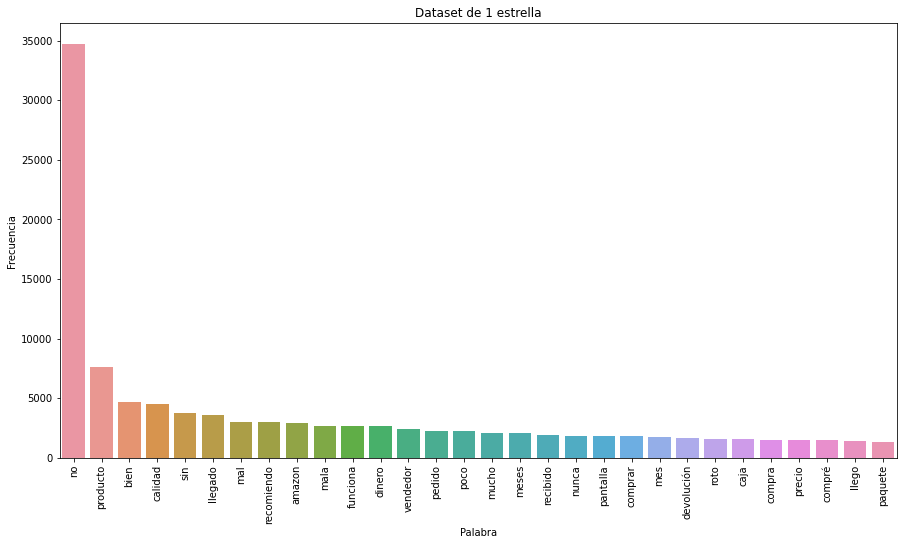

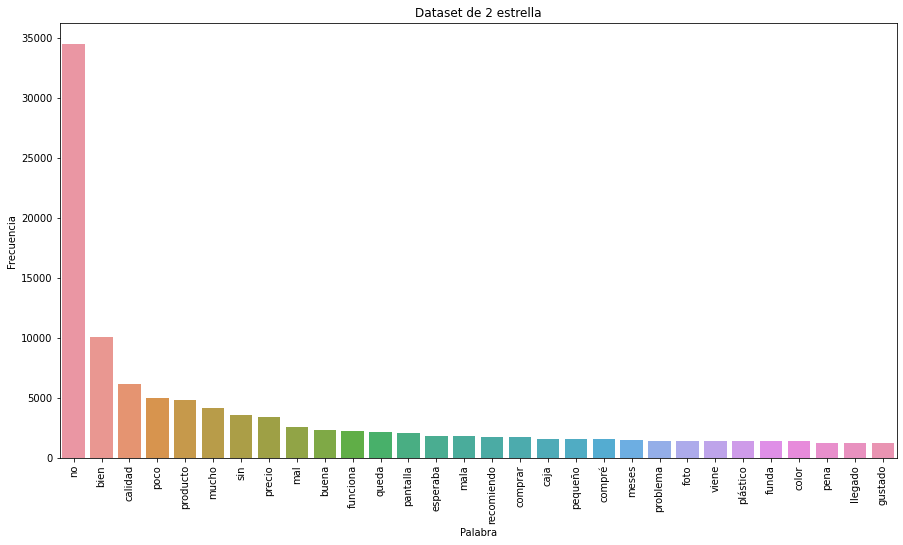

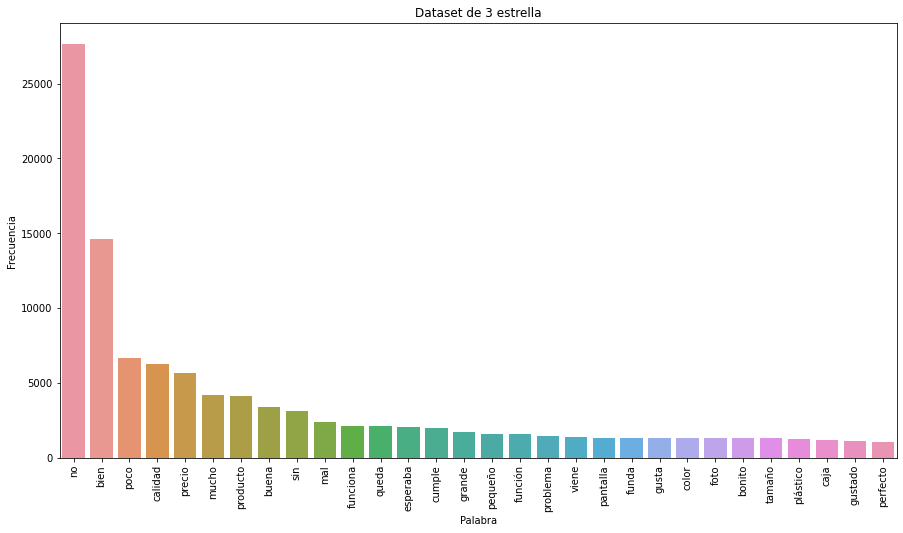

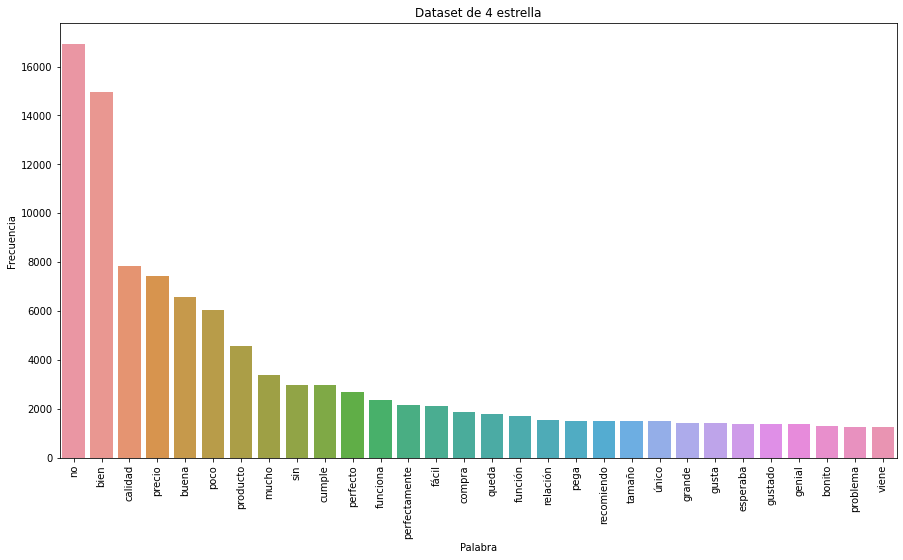

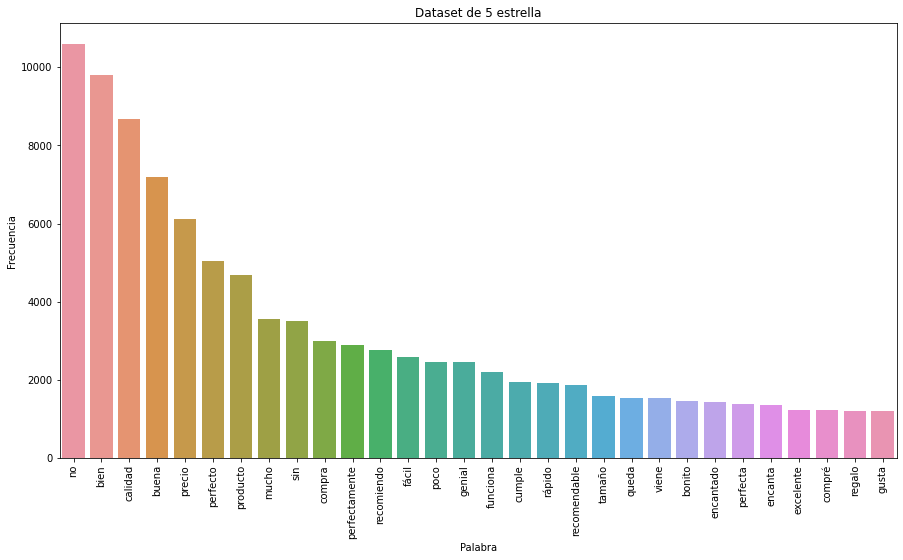

In [ ]:
# Obtengo la frecuencia por palabra y grafico

for i in np.arange(0,5,1):
  titulo= 'dataset de '+str(i)+'estrelas'
  df_freq=frecuencia_palabra(lista_dataset_data[i])
  plt.figure(figsize = (15,8))
  plot = sns.barplot(x  = df_freq.iloc[:30].Palabra, y = df_freq.iloc[:30].Frecuencia)
  plt.title("Dataset de "+ str(i+1)+ ' estrella')
  for item in plot.get_xticklabels():
    item.set_rotation(90)
  plt.show()

##**Analisis de estadistica descriptiva**


**Cantidad de productos por estrelas por categoría**

In [ ]:
# Estadistica descriptiva
data.groupby('stars')['product_category'].describe().style.background_gradient(cmap='Blues')

,count,unique,top,freq
stars,,,,
1,42000,30,wireless,6605
2,42000,30,wireless,5972
3,42000,30,home,5758
4,42000,30,home,5598
5,42000,30,home,5510


* Se observa que los productos de la catergoría Wireless son los peores ya que presentan clasificación de uno y dos estrellas

**Estadistica descriptiva por categoría**

In [ ]:
data.groupby('product_category')['stars'].describe().style.background_gradient(cmap='Blues')

,count,mean,std,min,25%,50%,75%,max
product_category,,,,,,,,
apparel,6014.000000,2.869638,1.386411,1.000000,2.000000,3.000000,4.000000,5.000000
automotive,7495.000000,2.955704,1.408223,1.000000,2.000000,3.000000,4.000000,5.000000
baby_product,5098.000000,3.088466,1.383009,1.000000,2.000000,3.000000,4.000000,5.000000
beauty,7707.000000,2.940574,1.414616,1.000000,2.000000,3.000000,4.000000,5.000000
book,5528.000000,3.404848,1.393201,1.000000,2.000000,4.000000,5.000000,5.000000
camera,3180.000000,3.101572,1.398353,1.000000,2.000000,3.000000,4.000000,5.000000
digital_ebook_purchase,1936.000000,3.361054,1.283290,1.000000,2.000000,3.000000,4.000000,5.000000
drugstore,5778.000000,3.004673,1.432025,1.000000,2.000000,3.000000,4.000000,5.000000
electronics,10899.000000,2.891091,1.436415,1.000000,2.000000,3.000000,4.000000,5.000000


* Se visualiza que las categoría book, digital_ebook_purchase y luggage son las que tienen puntuación media mas alta
* La categoría video_games es la que tiene desviación estandar más alta

**Analisis de cantidad de caracteres por clasificación**

In [ ]:
# Creo campo con el largo de texto de los review_body y review_title
data['review_body_length'] = df_train['review_body'].apply(len)
data['review_title_length'] = df_train['review_title'].apply(len)


In [ ]:
data.groupby('stars')['review_body_length'].describe().style.background_gradient(cmap='Blues')

,count,mean,std,min,25%,50%,75%,max
stars,,,,,,,,
1,40000.000000,152.883475,126.669562,16.000000,74.000000,121.000000,188.000000,2356.000000
2,40000.000000,168.438750,139.441270,20.000000,83.000000,131.000000,208.000000,2898.000000
3,40000.000000,155.380300,133.936289,18.000000,72.000000,123.000000,190.000000,2459.000000
4,40000.000000,142.357200,126.397453,16.000000,61.000000,116.000000,174.000000,2201.000000
5,40000.000000,137.454825,131.906959,17.000000,54.000000,110.000000,167.000000,3086.000000


* Se observa que los usuarios escriben más para las clasificaciones entre 1 y 3 que para 4 y 5, siendo la clasificación 2 con mayor largo. Tambien se puede ver su desviación estandar que es muy amplia

In [ ]:
# Largo de texto de los review title
data.groupby('stars')['review_title_length'].describe().style.background_gradient(cmap='Blues')

,count,mean,std,min,25%,50%,75%,max
stars,,,,,,,,
1,40000.000000,19.629850,14.129352,1.000000,11.000000,16.000000,25.000000,128.000000
2,40000.000000,20.754525,13.996839,1.000000,11.000000,17.000000,26.000000,128.000000
3,40000.000000,19.664000,13.883046,1.000000,9.000000,16.000000,26.000000,128.000000
4,40000.000000,18.304375,12.881397,1.000000,9.000000,15.000000,24.000000,128.000000
5,40000.000000,17.496400,11.951676,1.000000,9.000000,14.000000,22.000000,128.000000


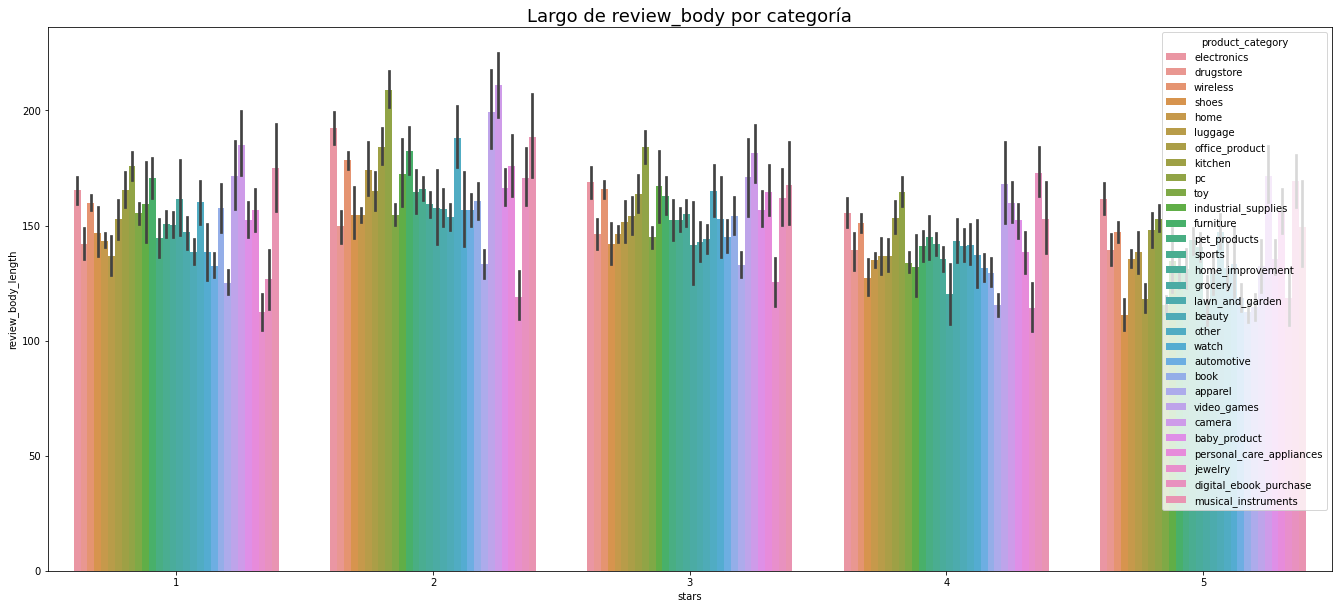

In [ ]:

plt.figure(figsize=(23,10))
plt.title("Largo de review_body por categoría", size=18)
sns.barplot(data = data, x = 'stars', y = 'review_body_length', hue = 'product_category')

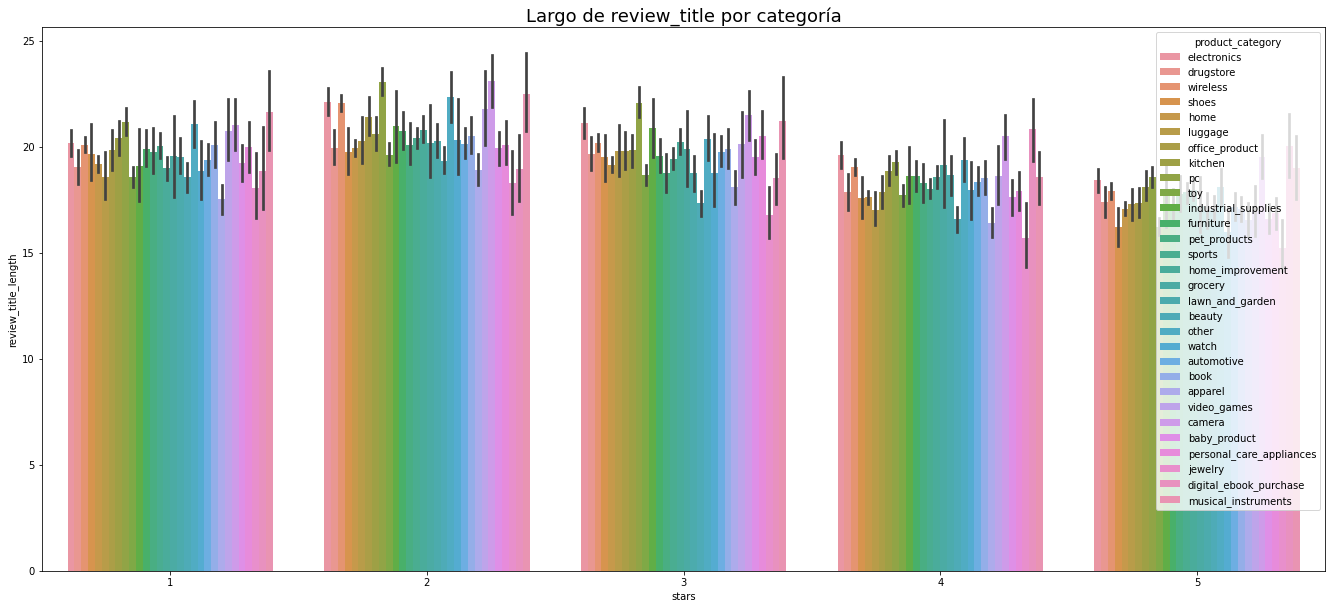

In [ ]:
plt.figure(figsize=(23,10))
plt.title("Largo de review_title por categoría", size=18)
sns.barplot(data = data, x = 'stars', y = 'review_title_length', hue = 'product_category')

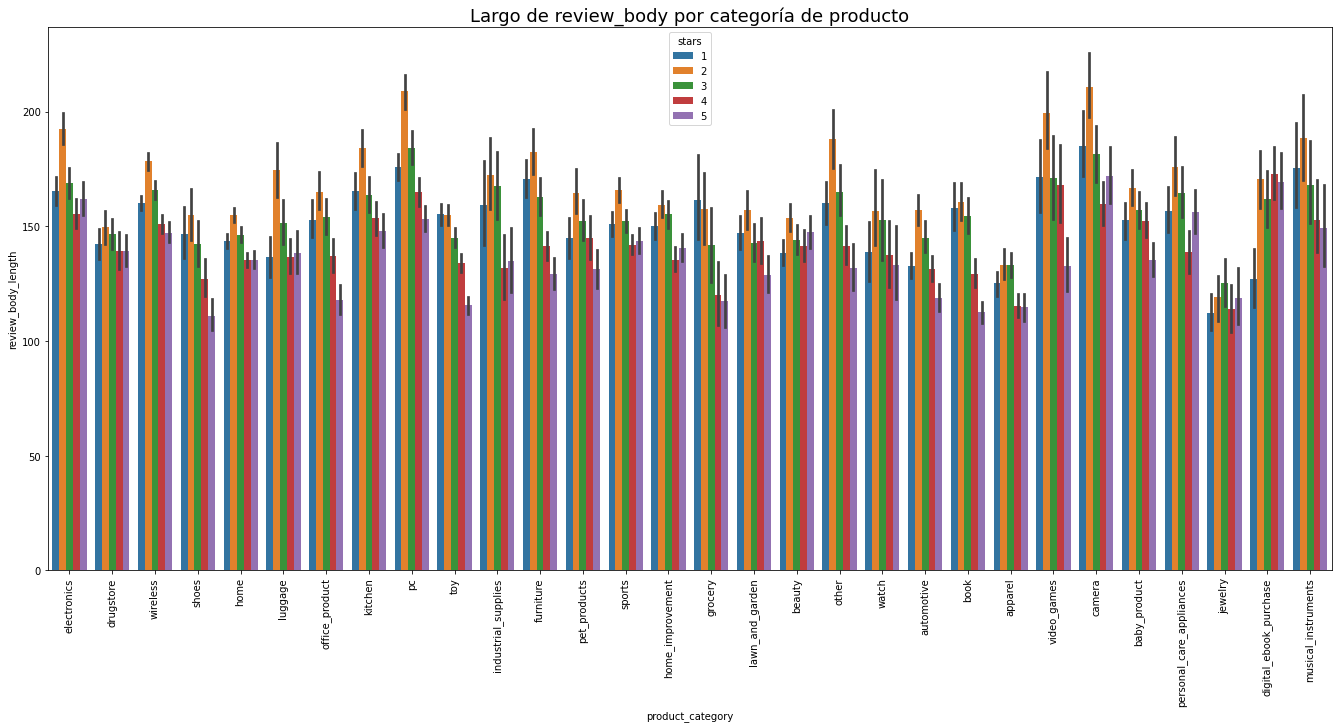

In [ ]:
plt.figure(figsize=(23,10))
plt.title("Largo de review_body por categoría de producto", size=18)
plt.xticks(rotation = 90)
sns.barplot(data = data, x = 'product_category', y = 'review_body_length', hue = 'stars')

* En este grafico se puede visualizar como los usuarios ecriben menos en las clasificaciones de 4 y 5 estrellas

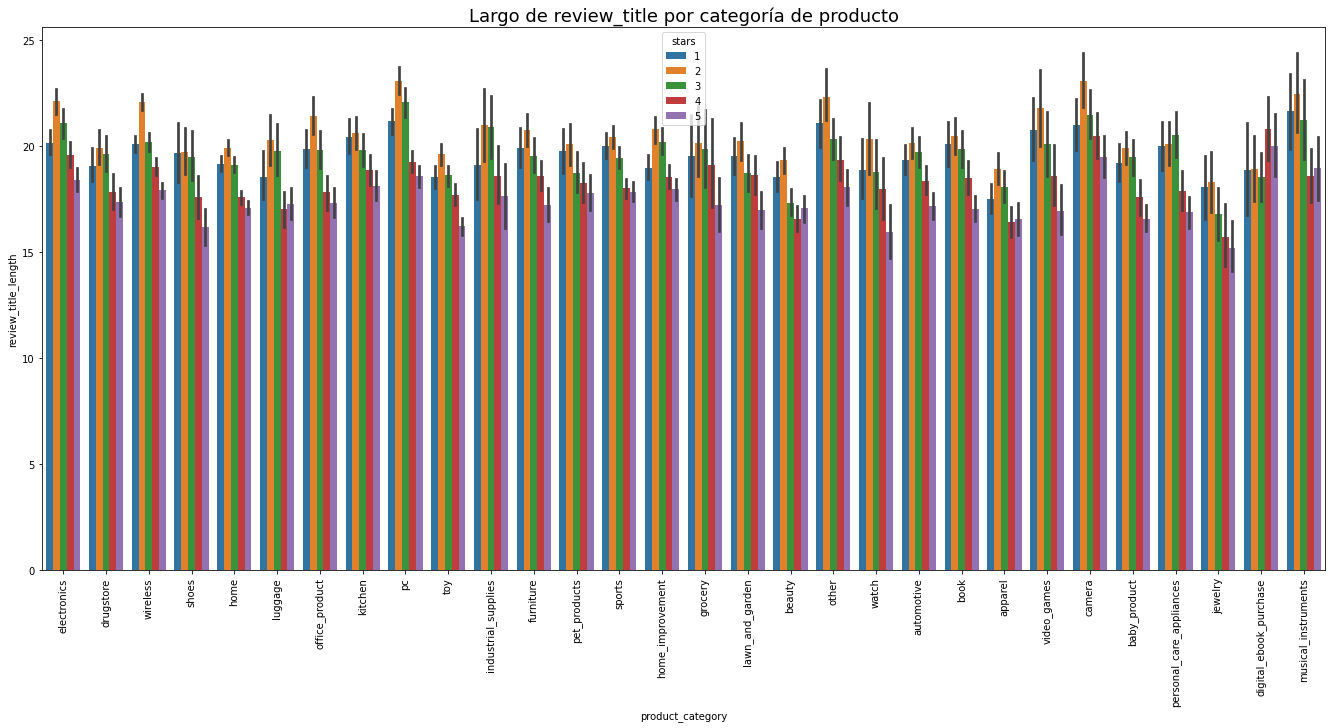

In [ ]:
plt.figure(figsize=(23,10))
plt.title("Largo de review_title por categoría de producto", size=18)
plt.xticks(rotation = 90)
sns.barplot(data = data, x = 'product_category', y = 'review_title_length', hue = 'stars')

* Lo mismo ocurre en los titulos de las review, escriben menos en las puntuaciones de 4 y 5 estrellas

**Nube de palabras**

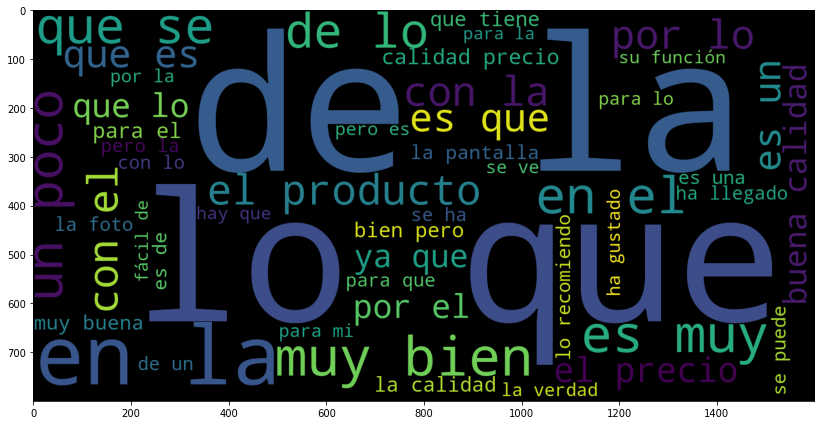

In [ ]:
plt.figure(figsize = (14,14)) 
wc = WordCloud(max_words = 50, width = 1600 , height = 800 ).generate(" ".join(data['review_body']))
plt.imshow(wc)

* Voy a necesitar limpiar los datos para poder analizar

## Limpieza de datos

In [ ]:
#Función para limpieza de datos con lemmatizer
def text_data_lemma(sentence):
    doc = nlp(sentence)
    
    clean_tokens = []
    for token in doc:
        if (str(token) not in spacy_stopwords and (len(token.text)>3 or token.text=="no"or token.text=="No")): 
            temp = token.lemma_.strip()
            clean_tokens.append(temp.lower())
    
    return clean_tokens

In [ ]:
# Libero espacio en memoria antes de ejecutar la función para optimizar los recursos
del(df_dev)
del(df_test)
del(df_train)
gc.collect()

137

* Este proceso puede demorara hasta 35 minutos

In [ ]:
# Limpiamos todas las reviews con lemmatizer
%%time
reviews_lemma = []
for i in data.index:
    rev = text_data_lemma(data.review_body.iloc[i])
    reviews_lemma.append(" ".join(rev))
reviews_lemma[:5]

CPU times: user 38min 26s, sys: 7.97 s, total: 38min 34s
Wall time: 38min 32s


In [ ]:
# Agrego la columna al dataframe
data["review_body_lemma"]= reviews_lemma

In [ ]:
# Guardo los datos en archivo csv
data.to_csv(r'data_lemma.csv', index = False)

# Leo el archivo ya procesado

#data = pd.read_csv('data_lemma.csv')
#data['review_body_lemma'] = data['review_body_lemma'].astype(str)

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
#data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Acamica_Proyecto3/data_lemma_1.csv') 


* Verifico presencia de valores faltantes

In [ ]:
# Verifico si existen valores nulos en la columna
data['review_body_lemma'].isna().sum()

0

In [ ]:
data_sin_nan=pd.DataFrame(data)

In [ ]:
data_sin_nan = data_sin_nan[data_sin_nan['review_body_lemma'].notna()]

In [ ]:
data_sin_nan[data_sin_nan['review_body_lemma'].isna()]

,product_category,review_title,review_body,stars,review_body_length,review_title_length,review_body_lemma


In [ ]:
data=data_sin_nan

In [ ]:
data.head()

,product_category,review_title,review_body,stars,review_body_length,review_title_length,review_body_lemma
0,electronics,television Nevir,Nada bueno se me fue ka pantalla en menos de 8...,1,94.0,16.0,nada pantalla mes no recibir respuesta fabricante
1,electronics,Dinero tirado a la basura con esta compra,"Horrible, nos tuvimos que comprar otro porque ...",1,140.0,41.0,horrible tener comprar inglés informático hora...
2,drugstore,solo llega una unidad cuando te obligan a comp...,Te obligan a comprar dos unidades y te llega s...,1,117.0,53.0,obligar comprar unidad llegar no forma reclama...
3,wireless,PRODUCTO NO RECIBIDO.,"No entro en descalificar al vendedor, solo pue...",1,332.0,21.0,no entrar descalificar vendedor mes espera ......
4,shoes,Devuelto,Llega tarde y co la talla equivocada,1,36.0,8.0,llegar talla equivocado


**Veamos un Review al azar**

In [ ]:
# Obtengo indice al azar para observar luego su review
random_index = np.random.randint(0,data.shape[0])
review = data.review_body.iloc[random_index]
review_l = data.review_body_lemma.iloc[random_index]
title = data.review_title.iloc[random_index]

print(color.DARKCYAN + '- ID:' + color.END, random_index,'\n' + color.DARKCYAN + '- Título:' + color.END,title,'\n' + color.DARKCYAN + '- Reseña:' + color.END, review)
print(color.DARKCYAN + '- Review Lematizada:' + color.END,review_l)
print(color.DARKCYAN + '- Valoración:' + color.END,data.stars[random_index])
print(color.DARKCYAN + '- Categoría:' + color.END, data.product_category[random_index])

- ID: 97946 
- Título: No me fue bien 
- Reseña: No me ha funcionado, se me olvidó devolverla
- Review Lematizada: no funcionar olvidar devolver él
- Valoración: 3
- Categoría: electronics


**Visualizo nube de palabrasa por estrella**

In [ ]:
# Filtro intancias correspondientes a cada estrella
comentarios_1=data[data['stars']==1]
comentarios_2=data[data['stars']==2]
comentarios_3=data[data['stars']==3]
comentarios_4=data[data['stars']==4]
comentarios_5=data[data['stars']==5]



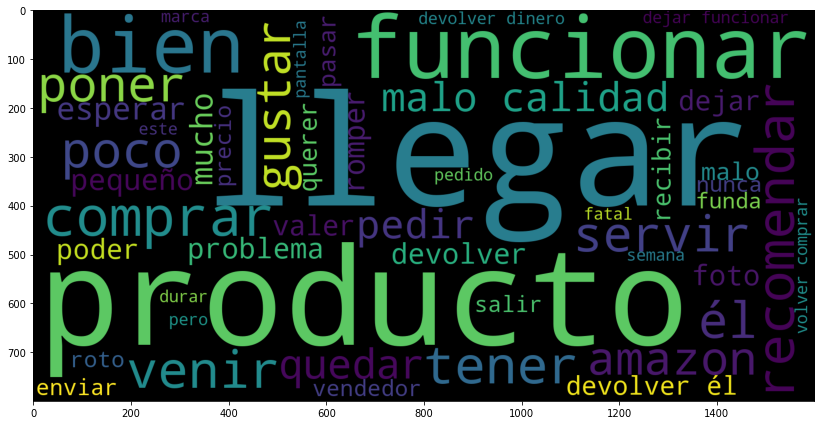

In [ ]:
#Frecuencia de palabras de Reseñas con puntuación de 1 estrella
plt.figure(figsize = (14,14)) 
wc = WordCloud( max_words = 50 , width = 1600 , height = 800).generate(" ".join(comentarios_1["review_body_lemma"]))
plt.imshow(wc)

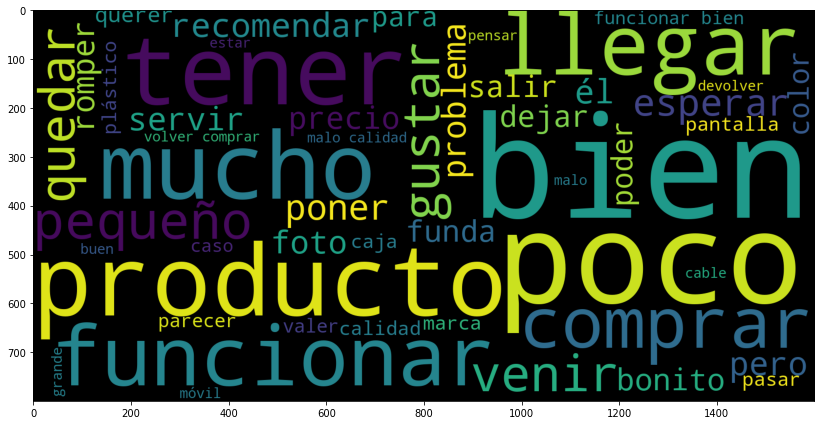

In [ ]:
#Frecuencia de palabras de Reseñas con puntuación de 2 estrella
plt.figure(figsize = (14,14)) 
wc = WordCloud( max_words = 50 , width = 1600 , height = 800).generate(" ".join(comentarios_2["review_body_lemma"]))
plt.imshow(wc)

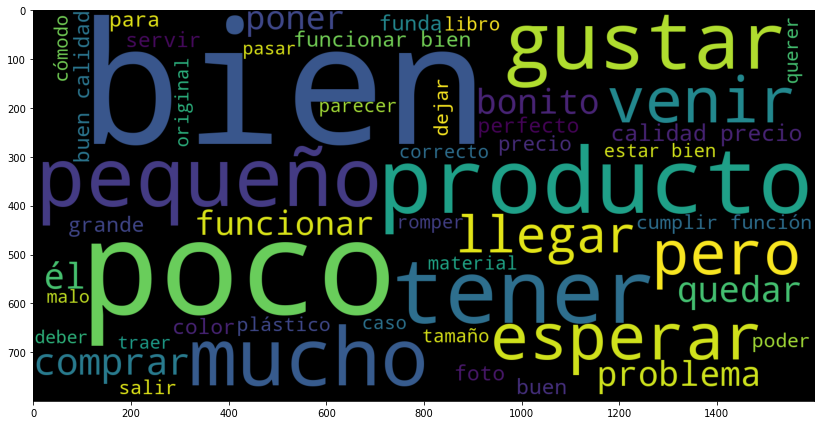

In [ ]:
#Frecuencia de palabras de Reseñas con puntuación de 3 estrella
plt.figure(figsize = (14,14)) 
wc = WordCloud( max_words = 50 , width = 1600 , height = 800).generate(" ".join(comentarios_3["review_body_lemma"]))
plt.imshow(wc)

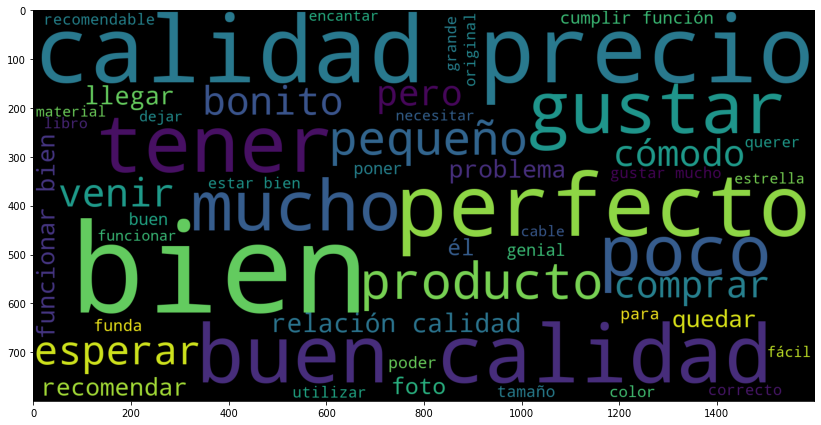

In [ ]:
#Frecuencia de palabras de Reseñas con puntuación de 4 estrella
plt.figure(figsize = (14,14)) 
wc = WordCloud( max_words = 50 , width = 1600 , height = 800).generate(" ".join(comentarios_4["review_body_lemma"]))
plt.imshow(wc)

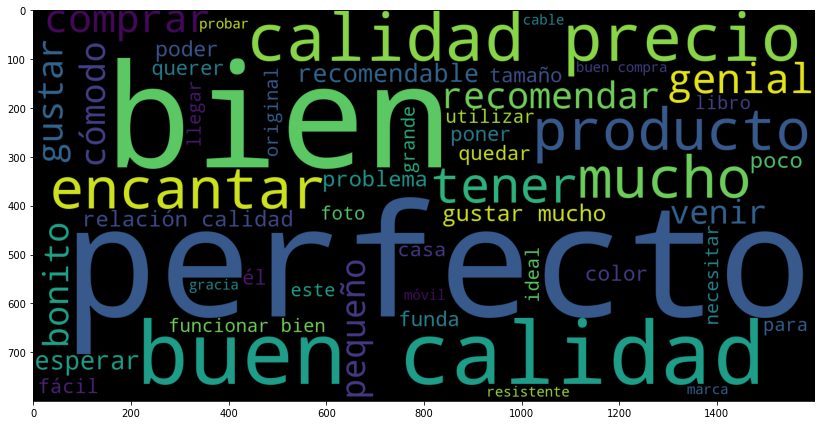

In [ ]:
#Frecuencia de palabras de Reseñas con puntuación de 5 estrella
plt.figure(figsize = (14,14)) 
wc = WordCloud( max_words = 50 , width = 1600 , height = 800).generate(" ".join(comentarios_5["review_body_lemma"]))
plt.imshow(wc)

#B. Modelo de Machine Learning



Estamos frente a un problema de clasificación multiple sobre un dataset balanceado, es por ello que eligo el accuracy_score para evaluar y comparar los modelos 

Basicamente es la sumataria de las predicciones correctas dividido el total de muestras.

En un primer momento como modelo de benchmark implementaré un Naive Bayes para lo cual utilezaré CounVectorizer para vectorizar las reviews

Se realizará una partición para entrenamiento del 80 % del dataset y un 20 % para test


Como complemento, utilizaremos el Classification report para ver cómo los demás parámetros

Por último elaboramos función para visualizar la matriz de confusión de cada modelo

In [3]:
# Vectorización
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
sns.set()
# Separación de train y test
from sklearn.model_selection import train_test_split
# Metricas
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import make_scorer
from sklearn.metrics import plot_confusion_matrix
# Optimización de parametros
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

**Modelos a utilizar**

In [4]:
# Modelos
from sklearn.naive_bayes import GaussianNB
from xgboost.sklearn import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC

**Función para graficar Matriz de Confución**

In [ ]:
# Función para graficar matriz de confución
def plot_cm(y,y_pred):
    names=["1","2","3","4","5"]
    cm=confusion_matrix(y,y_pred)
    f,ax=plt.subplots(figsize=(7,7))
    sns.heatmap(cm,annot=True,ax=ax,fmt=".0f", cmap="YlGnBu")
    plt.xlabel("y_pred")
    plt.ylabel("y_true")
    ax.set_xticklabels(names)
    ax.set_yticklabels(names)
    plt.show()

    return

In [ ]:
list_reviews_lemm  = list(data['review_body_lemma'].values)
stars = data['stars'].values

**Vectorización**

Determinaré la cantidad maxima de palabras con más frecuencia para generar los vectores

In [ ]:
# Vectorizo utilizando countVectorizer
max_features=[500, 750, 1000, 1250, 1500]
for m_f in max_features:
    cou_vec = CountVectorizer(max_features=m_f)
    
    matriz_reviews_lemm = cou_vec.fit_transform(list_reviews_lemm)
    x = matriz_reviews_lemm.toarray()
    y = stars

    # Realizo separación de los datos en train y test
    xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)
    
    
    nb = GaussianNB()
    
    nb.fit(xtrain, ytrain)
    
    print(color.DARKCYAN + "Max Features: " + str(m_f))
    print(color.DARKCYAN + "Accuracy data en train: ", nb.score(xtrain, ytrain))
    print(color.DARKCYAN + "---"*25)
    print(color.DARKCYAN + "Accuracy data en test: ", nb.score(xtest, ytest))
    print("---"*25)

Max Features: 500
Accuracy data en train:  0.3867738095238095
---------------------------------------------------------------------------
Accuracy data en test:  0.3820952380952381
---------------------------------------------------------------------------
Max Features: 750
Accuracy data en train:  0.3833452380952381
---------------------------------------------------------------------------
Accuracy data en test:  0.37766666666666665
---------------------------------------------------------------------------
Max Features: 1000
Accuracy data en train:  0.38450595238095236
---------------------------------------------------------------------------
Accuracy data en test:  0.3768095238095238
---------------------------------------------------------------------------
Max Features: 1250
Accuracy data en train:  0.3807559523809524
---------------------------------------------------------------------------
Accuracy data en test:  0.3719047619047619
--------------------------------------------

Se observa que el valor óptimo de max_features utilizando CountVectorizer es de 500 obteniendo la mejor relación entre train y test

Veamos como se comporta max_features incorporando ngram_range=(1,2)

In [ ]:
nb = GaussianNB()
max_features = [500, 750, 1000, 1250, 1500]

for m_f in max_features:
    cou_vec = CountVectorizer(max_features=m_f, ngram_range=(1,2))
    
    matriz_reviews_lemm = cou_vec.fit_transform(list_reviews_lemm)
    x = matriz_reviews_lemm.toarray()
    y = stars
    # Realizo separación de los datos en train y test
    xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)
    
    nb.fit(xtrain, ytrain)
    
    print(color.DARKCYAN + "Max Features: " + str(m_f))
    print(color.DARKCYAN + "Accuracy data en train: ", nb.score(xtrain, ytrain))
    print(color.DARKCYAN +  "---"*25)
    print(color.DARKCYAN + "Accuracy data en test: ", nb.score(xtest, ytest))
    print(color.DARKCYAN + "---"*25)

Max Features: 500
Accuracy data en train:  0.40658333333333335
---------------------------------------------------------------------------
Accuracy data en test:  0.40254761904761904
---------------------------------------------------------------------------
Max Features: 750
Accuracy data en train:  0.40932738095238097
---------------------------------------------------------------------------
Accuracy data en test:  0.4034761904761905
---------------------------------------------------------------------------
Max Features: 1000
Accuracy data en train:  0.41145238095238096
---------------------------------------------------------------------------
Accuracy data en test:  0.4033333333333333
---------------------------------------------------------------------------
Max Features: 1250
Accuracy data en train:  0.4175
---------------------------------------------------------------------------
Accuracy data en test:  0.4086666666666667
------------------------------------------------------

Se observa una mejora por lo que elijo max_feature=750 y usar ngram_range=(1,2)

In [ ]:
m_f = 750
cou_vec = CountVectorizer(max_features=m_f, ngram_range=(1,2))

In [ ]:

matriz_reviews_lemm = cou_vec.fit_transform(list_reviews_lemm)
x_ = matriz_reviews_lemm.toarray()
y_ = stars
# realizo partición 80% para train y 20% para test 
xtrain_, xtest_, ytrain_, ytest_ = train_test_split(x_,y_,test_size=0.2,random_state=42,stratify=y_)

In [ ]:
nb.fit(xtrain_, ytrain_)

GaussianNB(priors=None, var_smoothing=1e-09)

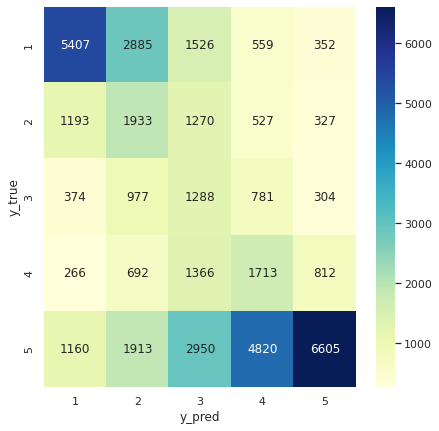

In [ ]:
ytest_pred = nb.predict(xtest_)
plot_cm(ytest_pred,ytest_)

In [ ]:
print(color.PURPLE + "Modelo de Benchmark")
print(color.PURPLE + classification_report(ytest_pred,ytest_))

Modelo de Benchmark
              precision    recall  f1-score   support

           1       0.64      0.50      0.57     10729
           2       0.23      0.37      0.28      5250
           3       0.15      0.35      0.21      3724
           4       0.20      0.35      0.26      4849
           5       0.79      0.38      0.51     17448

    accuracy                           0.40     42000
   macro avg       0.40      0.39      0.37     42000
weighted avg       0.56      0.40      0.44     42000



**Evaluación del modelo de Benchmark**

* El modelo tiene buena predicción tanto para la clase 1 como para la 5
* La clase que tiene mayor F1-score es la 1 lo cual implipa mayor relación entre precisión y recall
* el modelo presenta mal desempeño para las categorías 2,3 y 4




**Veamos comportamiento haciendo uso de  TfidfVectorizer para vectorizar**

In [ ]:
max_features = [500, 750, 1000, 1200]

for m_f in max_features:
    tfidf = TfidfVectorizer(max_features=m_f)

    matriz_reviews_lemm = tfidf.fit_transform(list_reviews_lemm)
    x = matriz_reviews_lemm.toarray()
    y = stars
    # Realizo separación de los datos en train y test
    xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

    nb = GaussianNB()
    nb.fit(xtrain, ytrain)

    print(color.DARKCYAN + "Max Features: " + str(m_f))
    print(color.DARKCYAN + "Accuracy en train: ", nb.score(xtrain, ytrain))
    print(color.DARKCYAN + "Accuracy en test: ", nb.score(xtest, ytest))
    print(color.DARKCYAN + "---"*25)

Max Features: 500
Accuracy en train:  0.4054583333333333
Accuracy en test:  0.39866666666666667
---------------------------------------------------------------------------
Max Features: 750
Accuracy en train:  0.4078988095238095
Accuracy en test:  0.39616666666666667
---------------------------------------------------------------------------
Max Features: 1000
Accuracy en train:  0.40925
Accuracy en test:  0.3932380952380952
---------------------------------------------------------------------------
Max Features: 1200
Accuracy en train:  0.40686904761904763
Accuracy en test:  0.39230952380952383
---------------------------------------------------------------------------



Podriamo decir que tiene mejor desempeño con max_features = 500, veamos ahora  TfidfVectorizer con ngrams_range igual a (1,2):

In [ ]:
# para no sobrecargar el procesamiento evito usar el valor de 1000
max_features = [300, 500, 750, 900]

for m_f in max_features:
    tfidf = TfidfVectorizer(max_features=m_f, ngram_range=(1,2))

    matriz_reviews_lemm = tfidf.fit_transform(list_reviews_lemm)
    x = matriz_reviews_lemm.toarray()
    y = stars
    # Realizo separación de train y test 
    xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

    nb = GaussianNB()
    nb.fit(xtrain, ytrain)

    print(color.DARKCYAN + "Max Features: " + str(m_f))
    print(color.DARKCYAN + "Accuracy en train: ", nb.score(xtrain, ytrain))
    print(color.DARKCYAN + "Accuracy en test: ", nb.score(xtest, ytest))
    print(color.DARKCYAN + "------------------------------------------------------------------------")

Max Features: 300
Accuracy en train:  0.410125
Accuracy en test:  0.40864285714285714
------------------------------------------------------------------------
Max Features: 500
Accuracy en train:  0.42475
Accuracy en test:  0.42083333333333334
------------------------------------------------------------------------
Max Features: 750
Accuracy en train:  0.431452380952381
Accuracy en test:  0.4206666666666667
------------------------------------------------------------------------
Max Features: 900
Accuracy en train:  0.43354761904761907
Accuracy en test:  0.4205952380952381
------------------------------------------------------------------------


Se observa una mejora utilizando TfidfVectorizer con max_features = 500 y ngram_range(1,2) por lo que será el metodo de vectorización a utilizar en los proximos modelos

### XGBClassifier

* Al correr este modelo con todos los datos da error al superar los recursos de google colab versión gratuita. Verifique ejecutarlo con el dataset de desarollo y corrio sin errores. Es por ello que estas lineas estan comentadas 

In [ ]:
tfidf = TfidfVectorizer(max_features=500, ngram_range=(1,2))
matriz_reviews_lemm = tfidf.fit_transform(list_reviews_lemm)
x = matriz_reviews_lemm.toarray()
y = stars
# Realizo separación de los datos en train y test
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

In [ ]:
print(xtrain.shape)
print(xtest.shape)

(168000, 500)
(42000, 500)


In [ ]:
xgb_classifier = XGBClassifier(objective = 'multi:softprob', )
#xgb_classifier = XGBClassifier(objective = 'multi:softmax')


In [ ]:
# Tiempo de ejecución 18 minutos
%%time
xgb_classifier.fit(xtrain, ytrain)

CPU times: user 14min 10s, sys: 738 ms, total: 14min 11s
Wall time: 14min 7s


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
ytrain_pred_xgb = xgb_classifier.predict(xtrain)
ytest_pred_xgb = xgb_classifier.predict(xtest)

In [ ]:
acc_train = accuracy_score(ytrain, ytrain_pred_xgb)
acc_test = accuracy_score(ytest, ytest_pred_xgb)

print(color.DARKCYAN + "Accuracy en train: " + str(acc_train))
print(color.DARKCYAN + "Accuracy en test: " + str(acc_test))

Accuracy en train: 0.426125
Accuracy en test: 0.4191666666666667


Se observa una mejora respecto de Naive Bayes.

Veamos la matriz de confución

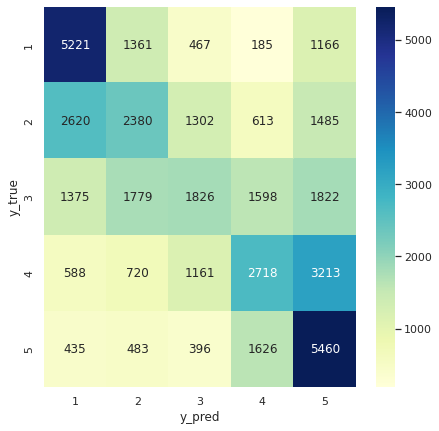

In [ ]:
# Matriz de confusión 
plot_cm(ytest,ytest_pred_xgb)

Veamos el reporte del clasificador

In [ ]:
print(color.DARKCYAN + classification_report(ytest,ytest_pred_xgb))

              precision    recall  f1-score   support

           1       0.51      0.62      0.56      8400
           2       0.35      0.28      0.31      8400
           3       0.35      0.22      0.27      8400
           4       0.40      0.32      0.36      8400
           5       0.42      0.65      0.51      8400

    accuracy                           0.42     42000
   macro avg       0.41      0.42      0.40     42000
weighted avg       0.41      0.42      0.40     42000



Se observa mejor desempeño en las categorias 2, 3 y 4 que Naive Bayes, no asi en la clase 1 y 5 aunque se mantiene los valores de F1-Score, en terminos generales tiene una leve mejora

### RandomForestClassifier

In [ ]:
random_forest = RandomForestClassifier(max_depth=None, 
                                       random_state=42)

In [ ]:
# Tiempo de ejecución 14 minutos
%%time
random_forest.fit(xtrain, ytrain)

CPU times: user 7min 49s, sys: 2.33 s, total: 7min 52s
Wall time: 7min 49s


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:
ytrain_pred_rf = random_forest.predict(xtrain)
ytest_pred_rf = random_forest.predict(xtest)

In [ ]:
acc_train = accuracy_score(ytrain, ytrain_pred_rf)
acc_test = accuracy_score(ytest, ytest_pred_rf)

print(color.DARKCYAN + "Accuracy en train: " + str(acc_train))
print(color.DARKCYAN + "Accuracy en test: " + str(acc_test))

Accuracy en train: 0.9363452380952381
Accuracy en test: 0.4485


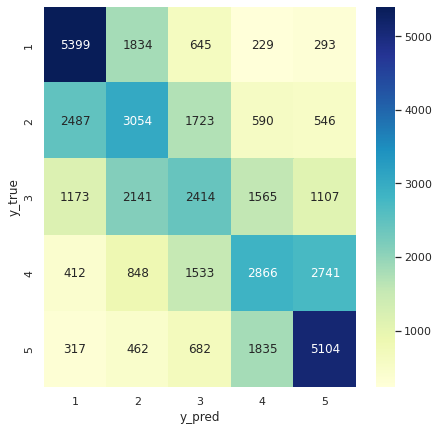

In [ ]:
plot_cm(ytest,ytest_pred_rf)

In [ ]:
print(color.DARKCYAN + classification_report(ytest,ytest_pred_rf))

              precision    recall  f1-score   support

           1       0.55      0.64      0.59      8400
           2       0.37      0.36      0.36      8400
           3       0.35      0.29      0.31      8400
           4       0.40      0.34      0.37      8400
           5       0.52      0.61      0.56      8400

    accuracy                           0.45     42000
   macro avg       0.44      0.45      0.44     42000
weighted avg       0.44      0.45      0.44     42000



Presenta una mejora respecto del modelo anterior 

### LinearSVC

In [ ]:
svc = LinearSVC(C = 1, random_state=42)

In [ ]:
%%time
svc.fit(xtrain, ytrain)

CPU times: user 15.8 s, sys: 46.9 ms, total: 15.8 s
Wall time: 15.8 s


LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=42, tol=0.0001,
          verbose=0)

In [ ]:
ytrain_pred_svc = svc.predict(xtrain)
ytest_pred_svc = svc.predict(xtest)


In [ ]:
acc_train = accuracy_score(ytrain, ytrain_pred_svc)
acc_test = accuracy_score(ytest, ytest_pred_svc)

print(color.DARKCYAN + "Accuracy en train: " + str(acc_train))
print(color.DARKCYAN + "Accuracy en test: " + str(acc_test))

Accuracy en train: 0.47335119047619045
Accuracy en test: 0.4659761904761905


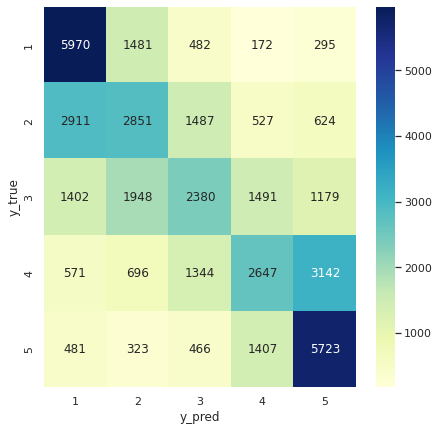

In [ ]:
plot_cm(ytest,ytest_pred_svc)

In [ ]:
print(color.DARKCYAN + classification_report(ytest,ytest_pred_svc))

              precision    recall  f1-score   support

           1       0.53      0.71      0.61      8400
           2       0.39      0.34      0.36      8400
           3       0.39      0.28      0.33      8400
           4       0.42      0.32      0.36      8400
           5       0.52      0.68      0.59      8400

    accuracy                           0.47     42000
   macro avg       0.45      0.47      0.45     42000
weighted avg       0.45      0.47      0.45     42000



## Comparación de modelos

In [ ]:
YTest_preds = [ytest_pred_svc, ytest_pred_rf, ytest_pred_xgb, ytest_pred]
rows = []
for ytest_p in YTest_preds:
    reporte = classification_report(ytest, ytest_p, output_dict = True)
    rows.append([reporte['accuracy'], reporte['1']['f1-score'], reporte['2']['f1-score'], reporte['3']['f1-score'], reporte['4']['f1-score'], reporte['5']['f1-score']])
df_reporte = pd.DataFrame(rows, columns = ["Accuracy", "1 F1-S", "2 F1-S", "3 F1-S", "4 F1-S", "5 F1-S"], index = ["SVC", "RF", "XGB","NB"])

In [ ]:
df_reporte.style.background_gradient(cmap='Blues')

,Accuracy,1 F1-S,2 F1-S,3 F1-S,4 F1-S,5 F1-S
SVC,0.465976,0.605016,0.363208,0.326946,0.361513,0.591127
RF,0.448500,0.593688,0.364896,0.313568,0.370165,0.561157
XGB,0.419167,0.560223,0.314752,0.269481,0.359049,0.506823
NB,0.403476,0.565320,0.283223,0.212471,0.258586,0.511065



**Resultados:**

En base a lo observado el Accuracy en LinearSVC es el mayor de todos con un valor igual a 0.4657.
Todos los modelos tienen un mayor F1-Score en la clase de 1 estrella, seguida de la clase de 5 estrellas.
Todos los modelos siguen sin desempeñarse adecuadamente en las clase de 2, 3 y 4 estrellas.
LinearSVC es el que tiene mayor F1-Score en las clases de 1, 2, 3 y 5 estrellas.
RandomForest es el que tiene mayor F1-Score en las clase de 4 estrellas.

**Matriz de confución**

In [ ]:
clasificadores = [svc, random_forest, xgb_classifier, nb]
clasificadores_names = ["LinearSVC", "RandomForestClassifier", "XGB","NB"]

#clasificadores = [svc, random_forest, nb]
#clasificadores_names = ["LinearSVC", "RandomForestClassifier","NB"]

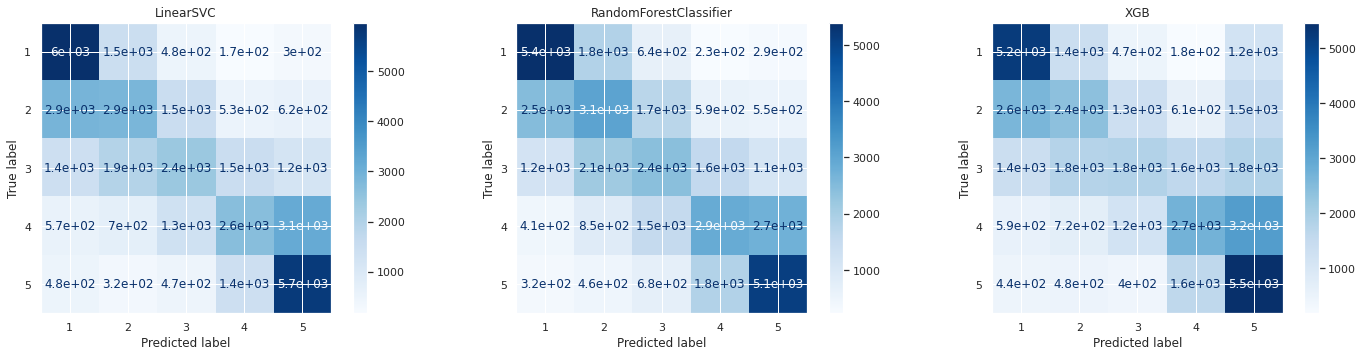

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20,5))
i = 0
for cls, ax in zip(clasificadores, axes.flatten()):
    plot_confusion_matrix(cls, 
                          xtest, 
                          ytest, 
                          ax=ax, 
                          cmap='Blues')
    ax.title.set_text(clasificadores_names[i])
    i += 1
plt.tight_layout()  
plt.show()


Observando las matrcies de cofusion se puede ver que los tres modelos se comportan de manera similar. En la diagonal de la matriz LinearSVC cuenta con mayores aciertos excepto por la clase 3 en la que RandomForest es mejor

El modelo elegido es LinearSVC, ya que en la mayoria de las metricas vistas supera a los otros modelos.

##Veamos los mayors y menores pesos asignados a cada palabra en el vocabulario en cada clase

In [ ]:
svc = LinearSVC()


In [ ]:
svc.fit(xtrain, ytrain)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [ ]:
ytrain_ped = svc.predict(xtrain)
ytest_pred = svc.predict(xtest)


Me traigo el vocabulario de mi TfidfVectorizer:

In [ ]:
vocab = tfidf.get_feature_names()

In [ ]:
vocab

['100',
 'abajo',
 'abierto',
 'abrir',
 'acabado',
 'acabar',
 'accesorio',
 'aceptable',
 'adaptar',
 'adecuado',
 'además',
 'agradable',
 'agua',
 'aguantar',
 'agujero',
 'ahora',
 'aire',
 'ajustar',
 'ajustar bien',
 'alguno',
 'alto',
 'amazon',
 'anuncio',
 'apagar',
 'aparato',
 'aparecer',
 'aplicación',
 'apretar',
 'artículo',
 'aspecto',
 'aunque',
 'auricular',
 'año',
 'bajo',
 'barato',
 'base',
 'bastante',
 'basura',
 'bateria',
 'batería',
 'bebé',
 'bien',
 'bien no',
 'bien precio',
 'blanco',
 'bolsa',
 'bolsillo',
 'bonito',
 'borde',
 'botón',
 'buen',
 'buen calidad',
 'buen compra',
 'buen producto',
 'buen relación',
 'buscar',
 'caber',
 'cable',
 'caer',
 'caja',
 'calentar',
 'calidad',
 'calidad buen',
 'calidad no',
 'calidad precio',
 'calor',
 'cambiar',
 'cambio',
 'cantidad',
 'capacidad',
 'cara',
 'carga',
 'cargador',
 'cargar',
 'caro',
 'casa',
 'caso',
 'cerrar',
 'chulo',
 'cierre',
 'cliente',
 'coche',
 'coger',
 'colocar',
 'color',
 'come


Me traigo los pesos asignados por LinearSVC a cada feature (palabra del vocabulario) en cada clase:

In [ ]:
weights = svc.coef_

In [ ]:
weights

array([[-4.83804801e-01,  1.70059178e-02,  2.34121952e-01, ...,
         1.03256830e-01, -7.25602876e-01, -6.33755901e-01],
       [-2.68947412e-01,  1.30042992e-01,  1.61791642e-01, ...,
         8.26143828e-02, -5.43809922e-01, -2.77316804e-01],
       [-2.26165559e-01,  1.51470901e-01, -1.11703413e-04, ...,
        -7.46304111e-02,  2.69212073e-02, -6.28443130e-02],
       [-3.77943390e-01, -5.50863233e-02, -1.88198751e-01, ...,
        -5.49267968e-02,  1.34037999e+00,  3.56558384e-01],
       [ 1.07571125e+00, -2.72091125e-01, -2.65802215e-01, ...,
        -8.01127776e-02, -4.44079181e-01,  4.00176687e-01]])

Veamos en un grafico los mayores y menores pesos asignados a cada palabra en el vocabulario en cada clase:

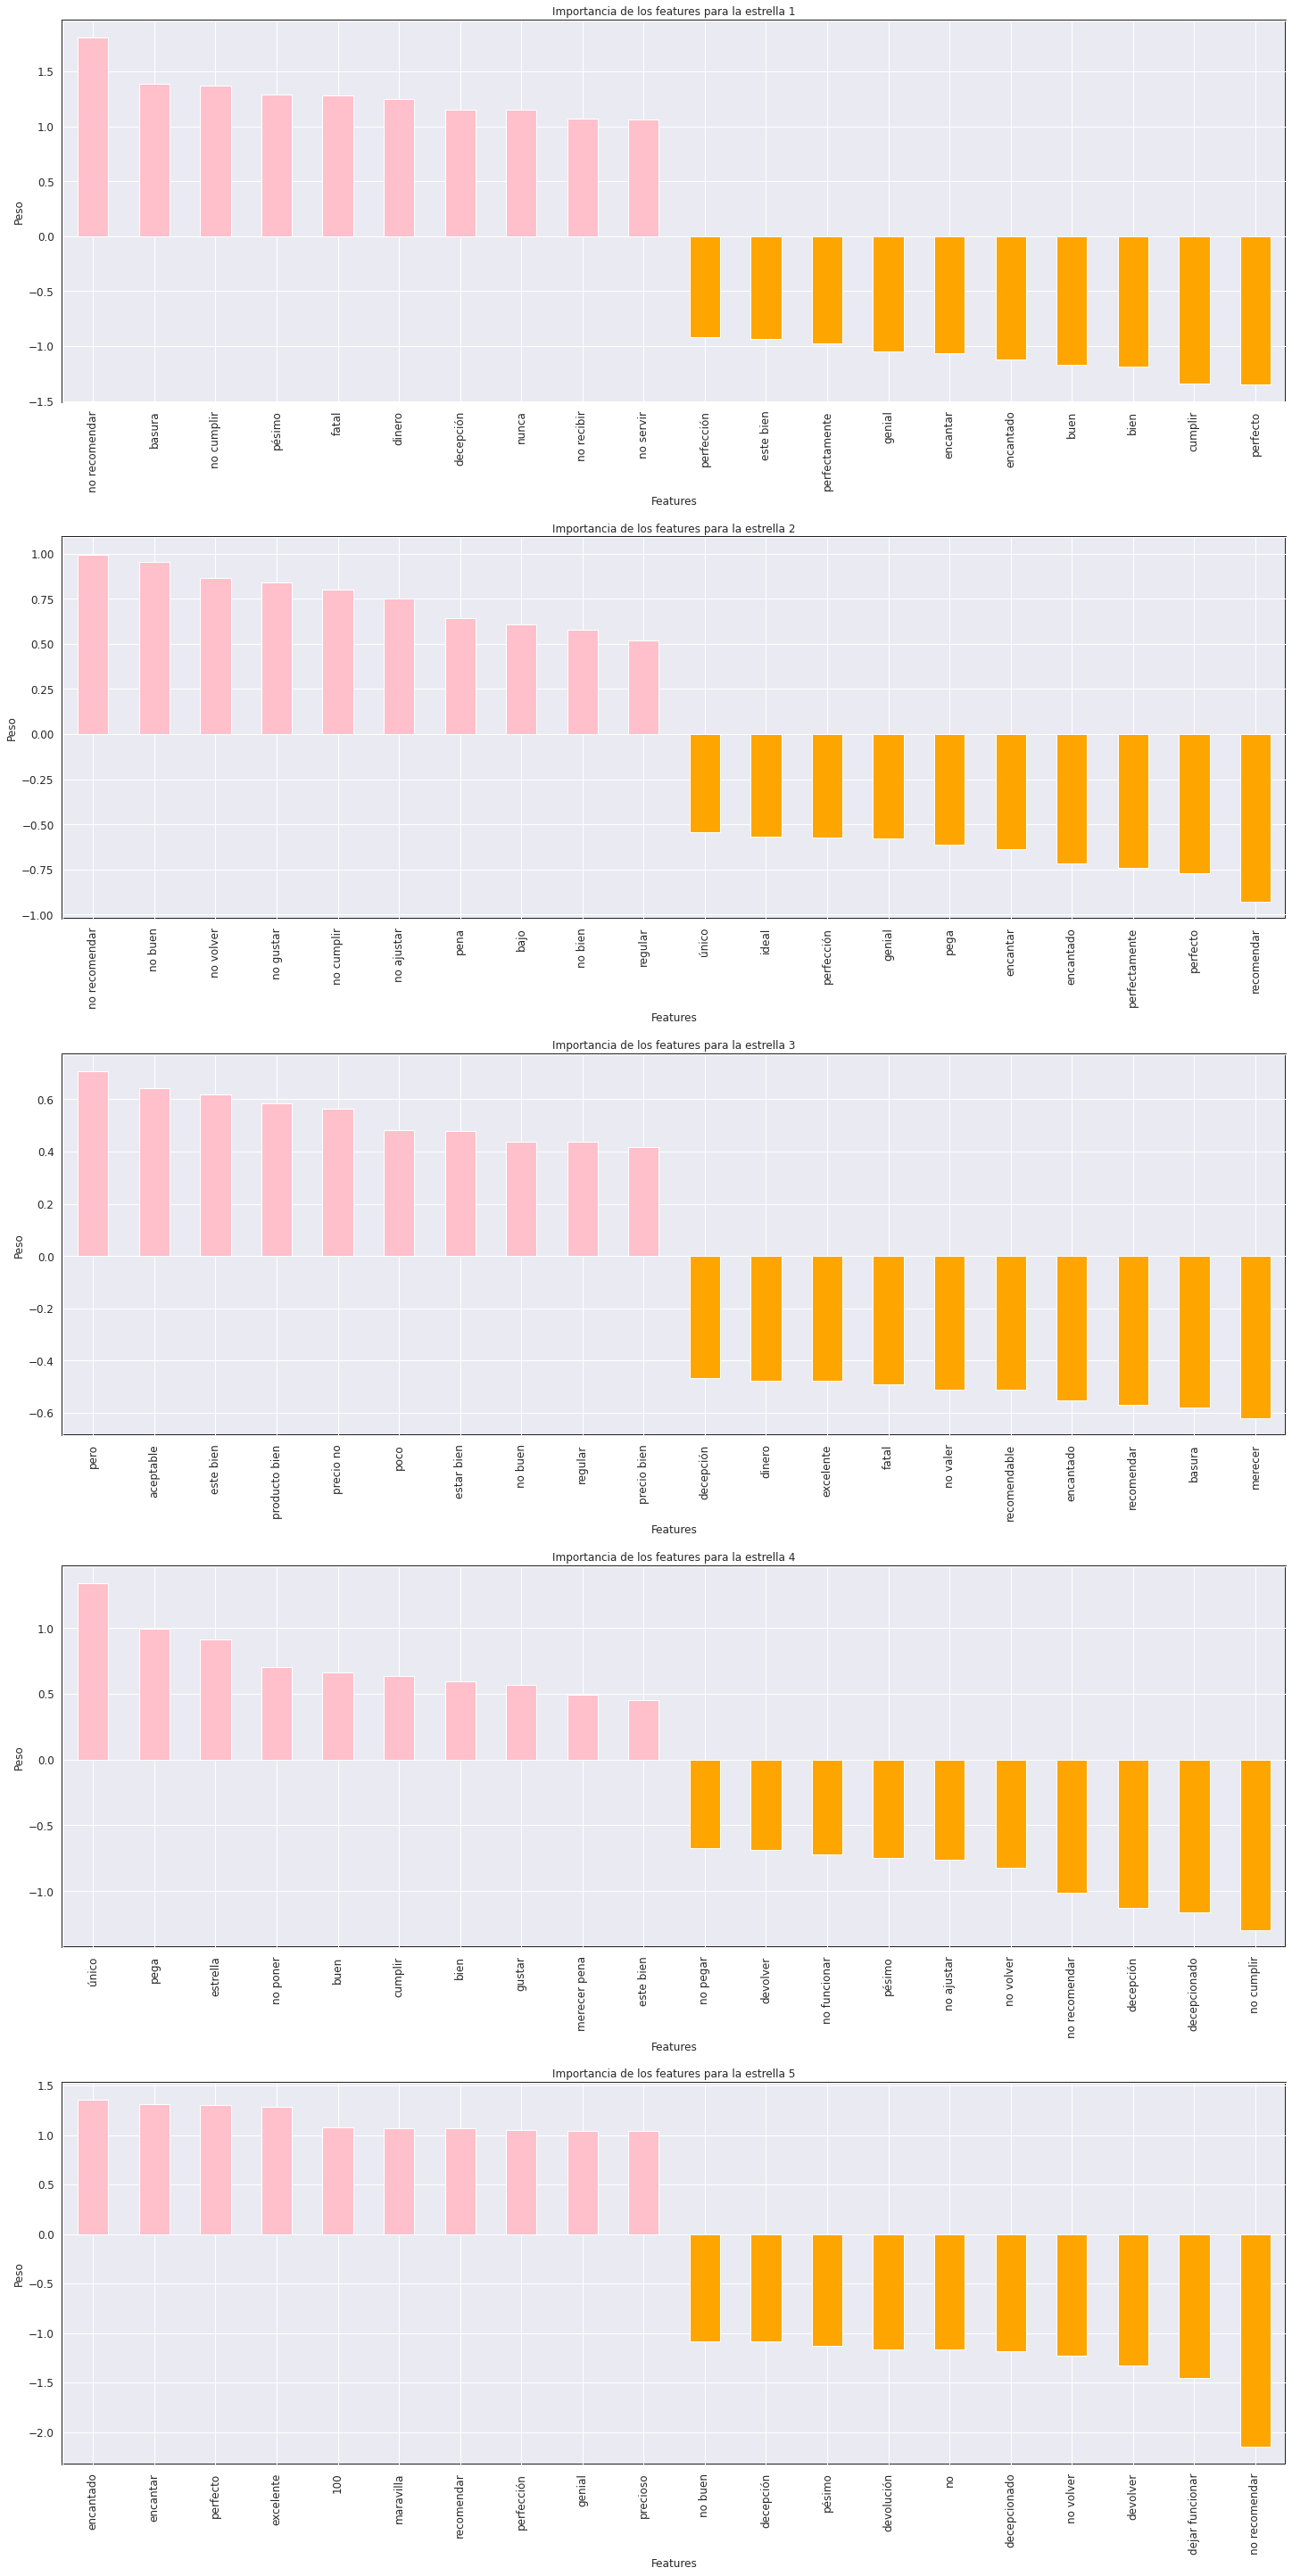

In [ ]:
fig, axes = plt.subplots(5, 1, figsize=(10, 10), constrained_layout=True)
for ax in axes.flatten():

    ax.patch.set_edgecolor('black') 
    ax.patch.set_linewidth('2')  

for i, ax_ in enumerate(axes.flatten()):
    df_weights = pd.DataFrame({"Features": vocab, "Weight": list(weights[i])})
    df_weights = df_weights.sort_values(by = ['Weight'], ascending = False)
    df_weights = pd.concat([df_weights.head(10), df_weights.tail(10)])
    df_weights = df_weights.sort_values(by = ['Weight'], ascending = False)
    df_weights['Positivo'] = df_weights['Weight'] > 0
    df_weights.set_index('Features', inplace = True)
    df_weights.Weight.plot(kind='bar', figsize = (20,40),
                              color = df_weights.Positivo.map({True: 'pink', False: 'orange'}),
                              fontsize=12, ax = ax_, title = 'Importancia de los features para la estrella ' + str(i+1), ylabel = 'Peso')
plt.show()


Observemos las palabras con sus respectivos pesos por clase

* En la clase 5 vemos que las palabras con mayor peso son: Excelente, 100, maravilla, recomendar, perfección, genial, precioso

* En la categoría 4 vemos: único, pega, estrella, no poner, buen, cumplir, bien, gustar, merecer pena, este bien

* En al clase 3 vemos las palabras con mayor peso: pero, aceptable, esta bien, producto bien, precio no, poco, estar bien, no buen, regular, precio bien

* Palabras con peso positivo en la clase 2: no recomenda, no buen, no volver, no gustar, no complir, no ajustar, pena, bajo, no bien, regular

* En la clase 1 podemos ver: no recomendar, basura, no cumplir, pesimo, faltal, dinero, desepción, nunca, no recibir, no servir,

Podemos ver en las clases 1 y 2 como las palabras que en categoría 4 y 5 tienen pesos positivos en estas tienen pesos negativos

En la clase 3 los pesos van entre 0,6 y 0,7 positivo y en el orden de los -0,6 negativos, tambien podemos ver palabras contradictorias por lo que da la impresición de no clasificar como ni bien ni mál

Por otra parte se puede ver que fue una buena desición incluir en el modelo la palabra "no" ya que aparece en las palabras con peso positivo tanto en la clase 1 como en la clase 2

#Modelo binario

Hare un analisis binario convertiendo el problema de multiclase en un problema binario.

Se Esperas que el desempeño sea mejor


Para ello primero dado que las palabras con peso positivas en la clase 3 eran ambiguas desidí excluirla para no pensalizar una puntuación positiva como negativa o viseversa, incluso si lo pienso desde el punto de vista de negocio puede tratarse de usuarios parcialmente satisfechos o parcialemtne insatisfechos

Par ello voy a hacer la siguiente asignación:



1, 2 $\rightarrow$ 0 (Negativo)

3 $\rightarrow$ se eliminan

4 y 5 $\rightarrow$ 1 (Positivo)

El resultado esperado es un notoria mejoraría en las metricas

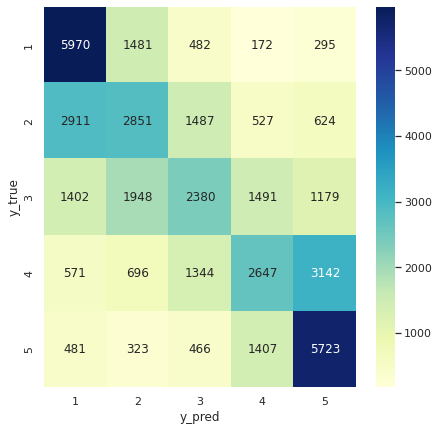

In [ ]:
# Visualización de matriz de confución
plot_cm(ytest,ytest_pred_svc)

In [ ]:
# Función para graficar matriz de confución
def plot_cm_binary(y,y_pred):
    names=["Negativo","Positivo"]
    cm=confusion_matrix(y,y_pred)
    f,ax=plt.subplots(figsize=(7,7))
    sns.heatmap(cm,annot=True,ax=ax,fmt=".0f", cmap="YlGnBu")
    plt.xlabel("y_pred")
    plt.ylabel("y_true")
    ax.set_xticklabels(names)
    ax.set_yticklabels(names)
    plt.show()

    return

In [ ]:
# Convierto el problema de multiclases a un problema binario
data_binary = data.copy()
data_binary = data_binary[data_binary['stars'] != 3 ]
data_binary['stars'].replace({
    1: 0,
    2: 0, 
    4: 1,
    5: 1
}, inplace = True)
reviews_lemm = data_binary['review_body_lemma']
list_binary = data_binary['stars']

In [ ]:
tfidf = TfidfVectorizer(max_features=750)
matriz_reviews_lemm = tfidf.fit_transform(reviews_lemm)
x = matriz_reviews_lemm.toarray()
y = list_binary
# Realizo separación de los datos en train y test
xtrain_binary, xtest_binary, ytrain_binary, ytest_binary = train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

In [ ]:
# veamos si el balance entre la clase 1 y 0 si está balanceada

In [ ]:
round(data_binary['stars'].value_counts()*100/len(data_binary['stars']),2)

1    50.0
0    50.0
Name: stars, dtype: float64

Se puede verificar que esta balanceado

**Entreno con LinearSVC**

Se realiza optimización de parametros

In [ ]:
params_linear_svc = {
    "C": [1e-8, 1e-4, 1e-2, 1e-1, 1],
    "max_iter": [750, 1000]
}

In [ ]:
linear_svc_binary = LinearSVC()

# Creo un diccionario con los scores a ver en la consola:

scoring = {'accuracy': make_scorer(accuracy_score),
           'precision': make_scorer(precision_score, average = 'macro'),
           'recall': make_scorer(recall_score, average = 'macro'),
           'f1_macro': make_scorer(f1_score, average = 'macro'),
           'f1_weighted': make_scorer(f1_score, average = 'weighted')}

In [ ]:
# optimización de parametros
linear_svc_opt_binary = RandomizedSearchCV(estimator = linear_svc_binary, param_distributions = params_linear_svc, n_iter = 20, scoring = scoring, cv = 5, n_jobs = -1, verbose = 10, refit = 'f1_weighted')


In [ ]:

linear_svc_opt_binary.fit(xtrain_binary, ytrain_binary)
#linear_svc_binary.fit(xtrain_binary, ytrain_binary)


Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 10 is smaller than n_iter=20. Running 10 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    7.6s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   11.6s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   14.9s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:   21.3s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   26.4s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   34.6s
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   46.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   52.2s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=LinearSVC(C=1.0, class_weight=None, dual=True,
                                       fit_intercept=True, intercept_scaling=1,
                                       loss='squared_hinge', max_iter=1000,
                                       multi_class='ovr', penalty='l2',
                                       random_state=None, tol=0.0001,
                                       verbose=0),
                   iid='deprecated', n_iter=20, n_jobs=-1,
                   param_distributions={'C': [1e-08, 0.0001, 0.01, 0.1, 1],
                                        'max_iter': [750, 1000]},
                   pre_dispatch='2*n_jobs', random_state=None,
                   refit='f1_weighted', return_train_score=False,
                   scoring={'accuracy': make_scorer(accuracy_score),
                            'f1_macro': make_scorer(f1_score, average=macro),
                            'f1_weighted': make_scorer(f

In [ ]:
print(color.DARKCYAN + "Mejores parametros: "+str(linear_svc_opt_binary.best_params_))
print(color.DARKCYAN + "Mejor Score: "+str(linear_svc_opt_binary.best_score_))


Mejores parametros: {'max_iter': 750, 'C': 0.1}
Mejor Score: 0.8546872010377653


In [ ]:
#Hago predicciones en test

ytrain_pred_svc_opt_binary = linear_svc_opt_binary.predict(xtrain_binary)
ytest_pred_svc_opt_binary = linear_svc_opt_binary.predict(xtest_binary)

#ytrain_pred_svc_binary = linear_svc_binary.predict(xtrain_binary)
#ytest_pred_svc_binary = linear_svc_binary.predict(xtest_binary)

In [ ]:
# Resultados de las metricas

acc_train = accuracy_score(ytrain_binary, ytrain_pred_svc_opt_binary)
acc_test = accuracy_score(ytest_binary, ytest_pred_svc_opt_binary)

#acc_train = accuracy_score(ytrain_binary, ytrain_pred_svc_binary)
#acc_test = accuracy_score(ytest_binary, ytest_pred_svc_binary)

print(color.DARKCYAN + "Accuracy en train: " + str(acc_train))
print(color.DARKCYAN + "Accuracy en test: " + str(acc_test))

Accuracy en train: 0.8579613095238096
Accuracy en test: 0.8581845238095238


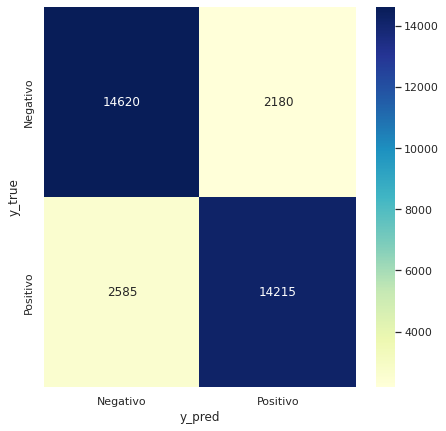

In [ ]:

plot_cm_binary(ytest_binary,ytest_pred_svc_opt_binary)
#plot_cm_binary(ytest_binary,ytest_pred_svc_binary)


In [ ]:
# Reportes de clasificación
print(color.DARKCYAN + classification_report(ytest_binary,ytest_pred_svc_opt_binary))

#print(color.DARKCYAN + classification_report(ytest_binary,ytest_pred_svc_binary))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86     16800
           1       0.87      0.85      0.86     16800

    accuracy                           0.86     33600
   macro avg       0.86      0.86      0.86     33600
weighted avg       0.86      0.86      0.86     33600



Se visualiza una gran mejora de las metricas tal como se esperaba. 

Algo que podria probar es concatengar Title con Body luego lematizar y evaluar los modelos nuevamente para ver si obtengo mejoras en las metricas

In [ ]:
print("-----"*25)

-----------------------------------------------------------------------------------------------------------------------------


# Investigación
Como desafío me gustaría probar:

* Modelo por Tema:
Investigar en la clase 3 para descubrir patrones de conducta por lo que los usuarios indicaron esta clasificación

Como hipotesis podría pensar que los ususarios estan disconforme de forma parcial, quizas con la atención, con la logística de entrega o con alguna particularidad el producto

El objetivo es crear una lista de temas segun su origigen con la finalidad de ayudar al negocio 

* Profundizar con modelos de redes neuronales
Dado que los modelos que vimos no tiene en cuanta la unión entre palabras en el modelo voy a produndizar con deep learning


[Deep Learning - Introducción práctica con keras](https://torres.ai/deep-learning-inteligencia-artificial-keras/)


[Clasificación de patrones mediante el uso de una red neuronal](https://rcs.cic.ipn.mx/2016_116/Clasificacion%20de%20patrones%20mediante%20el%20uso%20de%20una%20red%20neuronal%20pulsante.pdf)


**Pruebas rápidad para investigación**

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Acamica_Proyecto3/data_lemma_1.csv')

In [7]:
data = data[data['review_body_lemma'].notna()]

In [8]:
list_reviews_lemm  = list(data['review_body_lemma'].values)
stars = data['stars'].values

In [9]:
# Vectorizo
tfidf = TfidfVectorizer(max_features=500, ngram_range=(1,2))
matriz_reviews_lemm = tfidf.fit_transform(list_reviews_lemm)
x = matriz_reviews_lemm.toarray()
y = stars
# Realizo separación de los datos en train y test
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

In [10]:
# Instancio modelo
svc = LinearSVC()

In [11]:
# Entrenamiento
svc.fit(xtrain, ytrain)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [12]:
# Predicciónes
ytrain_ped = svc.predict(xtrain)
ytest_pred = svc.predict(xtest)

In [13]:
 vocab = tfidf.get_feature_names()

In [14]:
# Pesos de coeficientes
weights = svc.coef_

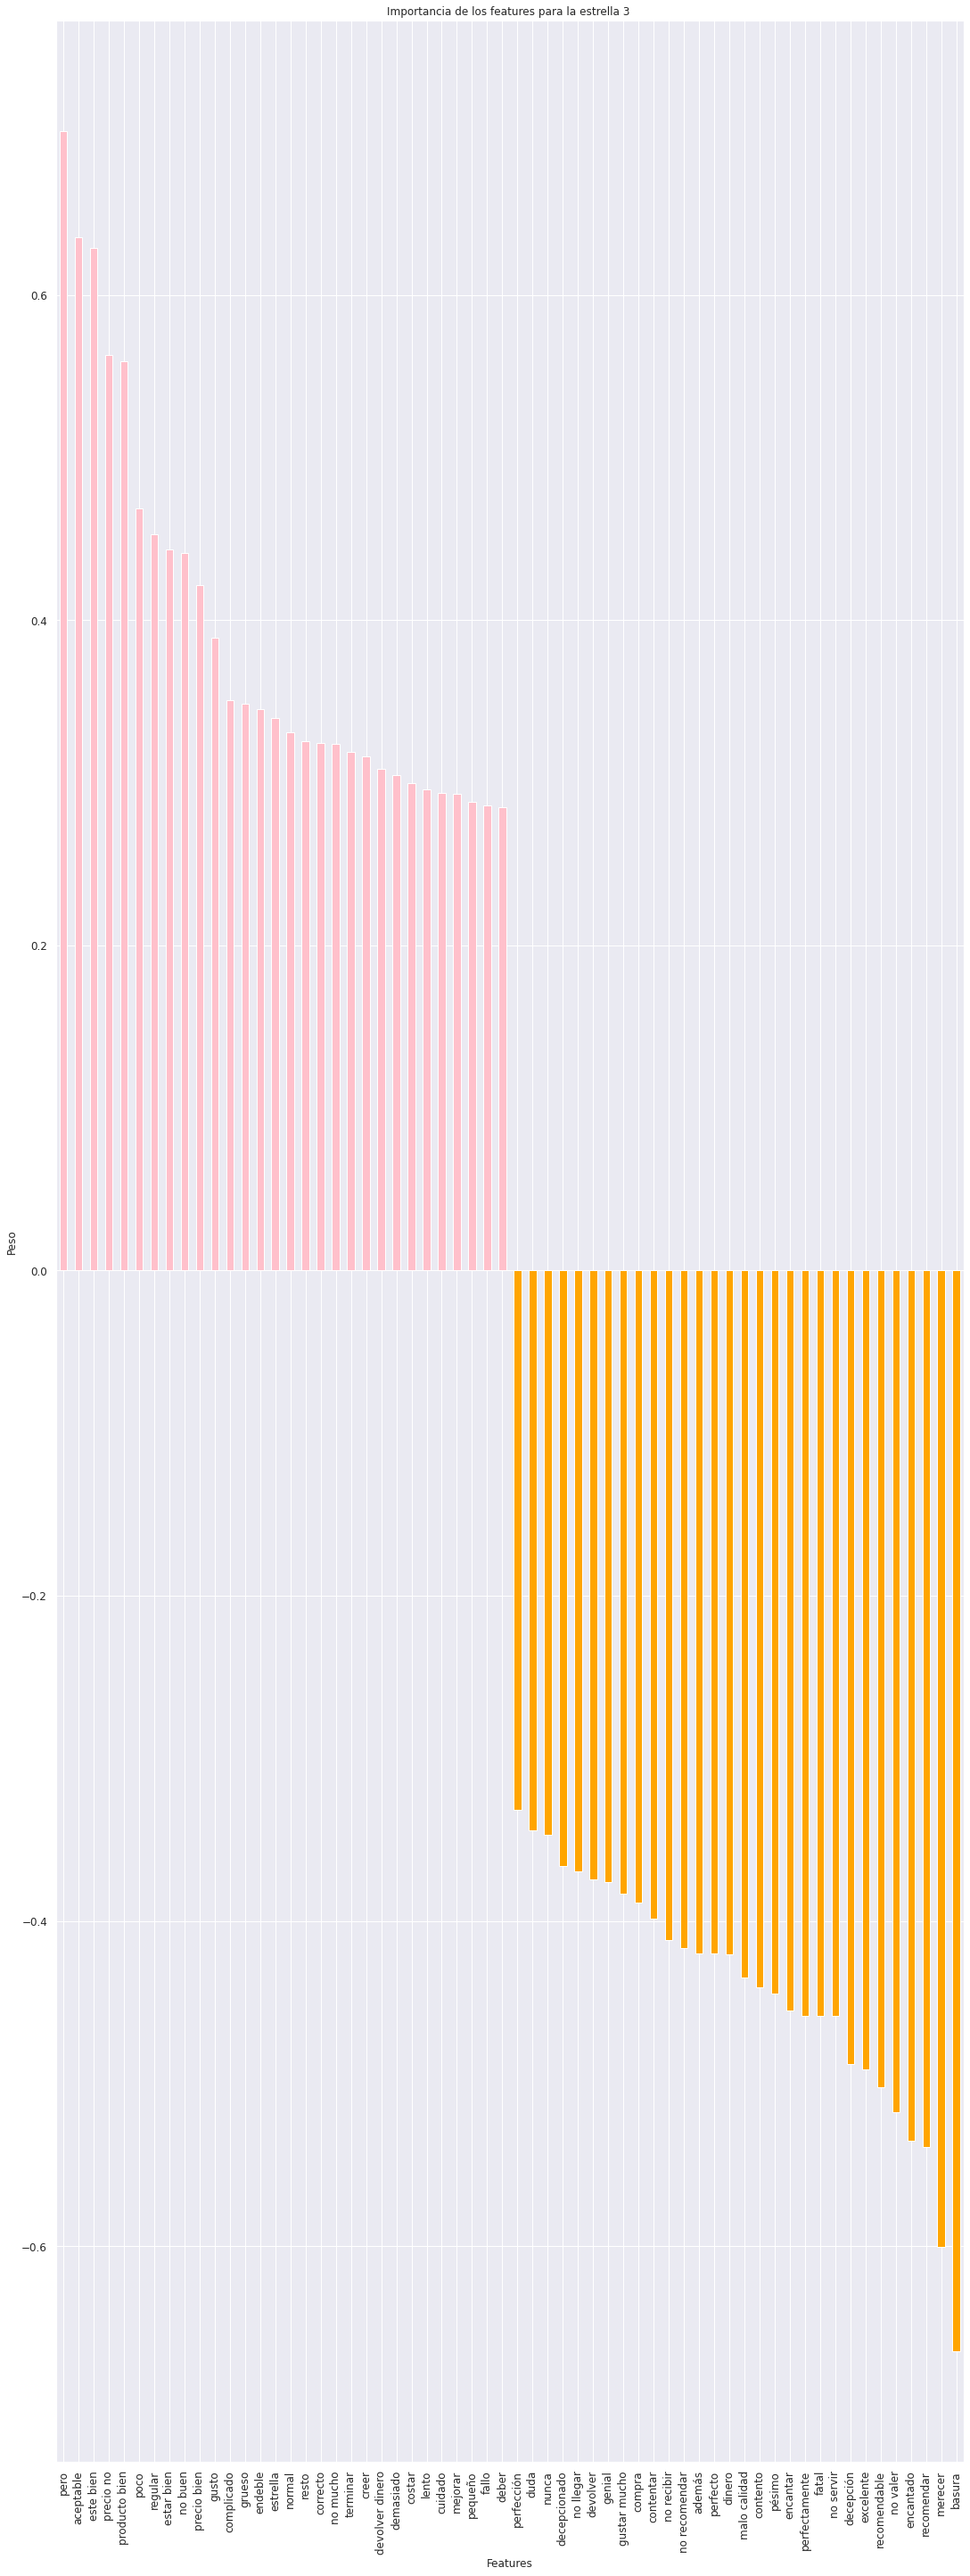

In [35]:
fig, axes = plt.subplots(1, 1, figsize=(10, 10), constrained_layout=True)

df_weights = pd.DataFrame({"Features": vocab, "Weight": list(weights[2])})
df_weights = df_weights.sort_values(by = ['Weight'], ascending = False)

# Concateno las primeras 30 palabras con más peso con los 30 con menos peso
df_weights = pd.concat([df_weights.head(30), df_weights.tail(30)])
df_weights = df_weights.sort_values(by = ['Weight'], ascending = False)
df_weights['Positivo'] = df_weights['Weight'] > 0
df_weights.set_index('Features', inplace = True)
df_weights.Weight.plot(kind='bar', figsize = (15,40), color = df_weights.Positivo.map({True: 'pink', False: 'orange'}),
                              fontsize=12, title = 'Importancia de los features para la estrella 3 ',
                              ylabel = 'Peso')
plt.show()

Como se puede ver aparece las palabras por separado sin tener en cuenta la unión entre ellas, por ej la palabra "Pero" me gustaría saber que palabras la anteceden y cuales estan posterior ya que da la idea de alguna sugerencia que podria estar detectandose y retroalimentar al negocio.

Para tratar estos casos estaré viendo modelos de redes neuronales